# **Maestría en Inteligencia Artificial Aplicada**

## **Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad 9: Modelos de predicción con modelos recurrentes**

### Javier Rebull
### A01795838


# Objetivo:
##### El desarrollo de esta actividad contribuye al cumplimiento de los objetivos del tema de Aprendizaje Profundo, modelos Secuenciales o Recurrentes y Series de Tiempo.


# **Introducción**

En esta actividad, hemos seleccionado las acciones de **Apple Inc. (AAPL)** para nuestro análisis de series de tiempo y predicción utilizando modelos recurrentes. Elegimos Apple porque es una de las empresas más valiosas y reconocidas a nivel mundial. Fundada en 1976, Apple ha revolucionado la industria tecnológica con productos innovadores como el iPhone, iPad y MacBook, y ha mantenido una trayectoria de crecimiento sostenido en su valor de mercado.

## **Valoración actual y proyecciones futuras**

A octubre de 2023, Apple continúa siendo una de las compañías con mayor capitalización bursátil en el mundo, superando los **2 billones de dólares**. Su sólida posición financiera y su capacidad para innovar constantemente la han posicionado como líder en el sector tecnológico. Con el creciente enfoque en servicios como Apple Music, Apple TV+ y la expansión en áreas como inteligencia artificial y realidad aumentada, los analistas proyectan que Apple seguirá experimentando un crecimiento significativo en el futuro. Estas proyecciones positivas hacen que sus acciones sean de gran interés para inversores y analistas financieros.

## **Obtención de datos y variables utilizadas**

Para llevar a cabo nuestro análisis, descargamos los datos históricos del precio de las acciones de Apple utilizando la biblioteca `yfinance`, que nos permite acceder fácilmente a información financiera desde Yahoo Finance. Nos enfocamos en los datos de los últimos cinco años para obtener una perspectiva actual y relevante del comportamiento de las acciones.

## En este estudio, utilizamos dos variables clave:

1. **Fecha (`Date` o `ds`):** Representa la fecha correspondiente a cada registro del precio de la acción. Esta variable es esencial para el análisis de series de tiempo, ya que nos permite ordenar cronológicamente los datos y detectar tendencias, patrones estacionales y ciclos en el comportamiento de la acción.

2. **Precio de Cierre Ajustado (`Adj Close` o `y`):** Este valor refleja el precio de cierre de la acción ajustado por eventos corporativos como dividendos, divisiones de acciones (splits) o emisiones de derechos. El **Precio de Cierre Ajustado** proporciona una visión más precisa del rendimiento histórico de la acción, ya que incorpora los ajustes necesarios para reflejar el valor real que un inversor habría obtenido si hubiera mantenido la acción durante ese período. Al utilizar esta variable, eliminamos distorsiones causadas por eventos corporativos y nos enfocamos en las variaciones genuinas del mercado.

Al analizar estas variables, buscamos construir modelos predictivos que nos permitan comprender y anticipar el comportamiento futuro de las acciones de Apple, aprovechando técnicas de aprendizaje automático y análisis de series de tiempo.

---

# **0 - Preparando los datos**

In [1]:
# Omitamos los Warnings por el momento:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Ignorar específicamente los warnings de convergencia de statsmodels
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
#!pip freeze   # Si deseas verificar qué librerías y versiones ya tiene google-Colab preinstaladas,
               # en particular "prophet" que usaremos en este ejercicio.

In [3]:
# Manipulación y Análisis de Datos
import numpy as np     # Librería para cálculos numéricos y científicos en Python, especialmente útil para trabajar con arreglos y matrices.
import pandas as pd    # Librería para manipulación y análisis de datos, permite trabajar con estructuras como DataFrames para organizar y limpiar datos.

# Visualización de Datos
import matplotlib.pyplot as plt    # Módulo de visualización que permite generar gráficos de líneas, dispersión, barras, etc., para interpretar los datos.

# Evaluación de Modelos
from sklearn.preprocessing import MinMaxScaler  # Escala los datos para normalizarlos en un rango específico, útil para modelos que requieren datos en escalas similares.
from sklearn.metrics import mean_squared_error  # Métrica para evaluar modelos de regresión, calcula el error cuadrático medio entre valores reales y predicciones.
import math  # Módulo estándar de matemáticas, proporciona funciones básicas como sqrt, sin, cos, etc., para cálculos aritméticos complementarios.

# Modelado de Series Temporales
from prophet import Prophet  # Librería de Facebook para modelado de series temporales con tendencia y estacionalidad, simplifica la predicción de series temporales.
from statsmodels.tsa.arima.model import ARIMA  # Para realizar pronósticos con modelos ARIMA y SARIMA, útiles en series temporales.

# Gráficos y Análisis de Series Temporales con Statsmodels
from statsmodels.graphics.tsaplots import month_plot, quarter_plot  # Funciones para visualizar patrones estacionales mensuales y trimestrales en datos temporales.
from statsmodels.tsa.seasonal import seasonal_decompose  # Descompone series temporales en tendencia, estacionalidad y residuales para entender patrones subyacentes.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para analizar la dependencia en diferentes rezagos.

# Obtención de Datos Financieros
import yfinance as yf  # Biblioteca para descargar datos financieros históricos (acciones, divisas, etc.) desde Yahoo Finance, útil para análisis financiero.

# Trabajar con Días Hábiles de EE.UU.
from pandas.tseries.holiday import USFederalHolidayCalendar  # Para trabajar con calendarios que excluyen días festivos en EE.UU.
from pandas.tseries.offsets import CustomBusinessDay  # Define días hábiles personalizados para ajustar los análisis de series temporales.

# Modelado con Redes Neuronales (LSTM)
import tensorflow as tf  # Biblioteca de aprendizaje automático utilizada para construir y entrenar redes neuronales.
from tensorflow.keras.models import Sequential  # Permite construir modelos de redes neuronales secuenciales.
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization  # Capas de LSTM, Dense, Dropout y BatchNormalization para construir modelos LSTM.

# **Obteniendo información de Yahoo Finance**

In [4]:
ticker_symbol = 'AAPL'   # selecciona las iniciales de la compañía deseada.
data = yf.download(ticker_symbol, period='5y')   # Se indica el período y descargamos.
data.to_csv('historical_data.csv')   # Guardamos los datos

[*********************100%***********************]  1 of 1 completed


In [5]:
path = 'historical_data.csv'
df = pd.read_csv(path, header=0)
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-11 00:00:00+00:00,63.549591064453125,65.55000305175781,65.61750030517578,64.56999969482422,64.57499694824219,81821200
3,2019-11-12 00:00:00+00:00,63.49140930175781,65.48999786376953,65.69750213623047,65.2300033569336,65.38749694824219,87388800
4,2019-11-13 00:00:00+00:00,64.0997543334961,66.11750030517578,66.19499969482422,65.26750183105469,65.28250122070312,102734400


In [6]:
df.info()   # La columna que nos interesa Adj Close y Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [7]:
print(df.columns) #Obteniendo las columnas del DataFrame

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [8]:
# Reseteamos el índice para obtener 'Date' como columna
data = data.reset_index()

# Seleccionamos las columnas 'Date' y 'Adj Close'
df = data[['Date', 'Adj Close']]

print(df.columns) #Obteniendo las columnas del DataFrame Nuevamente

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [9]:
# Renombremos de manera estándar las columnas de fechas y valores de la
# serie de tiempo, donde además la fecha la trasnformamos a tipo datetime:

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

df.head()

,ds,y
0,2019-11-11 00:00:00+00:00,63.549591
1,2019-11-12 00:00:00+00:00,63.491409
2,2019-11-13 00:00:00+00:00,64.099754
3,2019-11-14 00:00:00+00:00,63.656239
4,2019-11-15 00:00:00+00:00,64.412422


In [10]:
df.columns = ['ds', 'y'] # Dejando Ahora solo dos columnas: 'Date (ds)' y 'Adj Close (y)'.

In [11]:
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None) #Convertir la columna 'ds' a datetime y eliminar la zona horaria:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [13]:
# Mostrar los primeros registros del DataFrame
print(df.head())

          ds          y
0 2019-11-11  63.549591
1 2019-11-12  63.491409
2 2019-11-13  64.099754
3 2019-11-14  63.656239
4 2019-11-15  64.412422


In [14]:
# Mostrar los últimos registros del DataFrame
print(df.tail(20))

             ds           y
1238 2024-10-14  231.045807
1239 2024-10-15  233.593002
1240 2024-10-16  231.525269
1241 2024-10-17  231.894867
1242 2024-10-18  234.741730
1243 2024-10-21  236.220108
1244 2024-10-22  235.600800
1245 2024-10-23  230.506393
1246 2024-10-24  230.316620
1247 2024-10-25  231.155685
1248 2024-10-28  233.143494
1249 2024-10-29  233.413193
1250 2024-10-30  229.847122
1251 2024-10-31  225.661728
1252 2024-11-01  222.665024
1253 2024-11-04  221.766006
1254 2024-11-05  223.204422
1255 2024-11-06  222.475235
1256 2024-11-07  227.229996
1257 2024-11-08  226.960007


En particular datetime64[ns] nos ayuda a representar un rango de fechas muy amplio (del año 1678 al 2262) con precisión de nanosegundos.

### **Agreguemos los ajustes usuales en Series de tiempo:**

In [15]:
# Hagamos una copia del DataFrame df con índices temporales:
df_temp = df.copy()  # Crea una copia del DataFrame original 'df' y la asigna a 'df_temp'
df_temp.set_index('ds', inplace=True)  # Establece la columna 'ds' como índice del DataFrame 'df_temp'
df_temp  # Muestra el DataFrame 'df_temp' con el índice 'ds' establecido

,y
ds,
2019-11-11,63.549591
2019-11-12,63.491409
2019-11-13,64.099754
2019-11-14,63.656239
2019-11-15,64.412422
...,...
2024-11-04,221.766006
2024-11-05,223.204422
2024-11-06,222.475235


In [16]:
# Imprime la forma (número de filas y columnas) del DataFrame original
print(f"Shape of original DataFrame df: {df.shape}")

# Imprime la forma (número de filas y columnas) del DataFrame ajustado con días hábiles en EE.UU.
print(f"Shape of DataFrame df_temp (business days in the US): {df_temp.shape}")

Shape of original DataFrame df: (1258, 2)
Shape of DataFrame df_temp (business days in the US): (1258, 1)


https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [17]:
# Ajustemos la frecuencia de los índices, para que el modelo tenga información del período en que
# se encuentran los datos:

df_temp.index  # Observamos que aquí todavía no se tiene información del argumento "freq"

DatetimeIndex(['2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22',
               ...
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08'],
              dtype='datetime64[ns]', name='ds', length=1258, freq=None)

Para las opciones de "freq" ver la tabla que viene en esta liga:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [18]:
# Crear un calendario de días hábiles que excluya los días festivos de EE.UU.
us_business_days = CustomBusinessDay(calendar=USFederalHolidayCalendar())

# Cambiar la frecuencia del índice a días hábiles según el calendario de EE.UU.
df_temp = df_temp.asfreq(us_business_days, method='pad')  # 'pad' llena valores faltantes con el dato anterior

# Verificamos que el índice de df_temp esté configurado como un índice de fechas de días hábiles en EE.UU.
df_temp.index = pd.to_datetime(df_temp.index)  # Convertimos el índice en fechas

df_temp.index

DatetimeIndex(['2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-25',
               ...
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08'],
              dtype='datetime64[ns]', name='ds', length=1251, freq='C')

En este caso observamos que, freq='C' indica que el índice está usando una frecuencia de “CustomBusinessDay” (día hábil personalizado). Esto ocurre porque utilizamos CustomBusinessDay con un calendario específico de días hábiles (en este caso, los días laborables en EE.UU. que excluyen los festivos federales y fines de semana).

Esta frecuencia personalizada significa que:

	•	Solo se incluyen los días considerados hábiles según el calendario USFederalHolidayCalendar.
	•	Se excluyen fines de semana y festivos federales de EE.UU.

Así, freq='C' confirma que el índice de df_temp se ha ajustado a días hábiles de EE.UU.

In [19]:
# Verificar y mostrar la frecuencia del índice de df_temp
print("Frecuencia del índice en df_temp (días hábiles en EE.UU., excluyendo festivos):", df_temp.index.freq)

Frecuencia del índice en df_temp (días hábiles en EE.UU., excluyendo festivos): <CustomBusinessDay>


In [20]:
# Particionemos en conjuntos de entrenamiento y prueba, donde Test contiene los últimos 20 precios de mercado.

# Seleccionamos todas las filas excepto las últimas 20 para el conjunto de entrenamiento.
train = df_temp.iloc[0:-20, :]

# Seleccionamos las últimas 20 filas para el conjunto de prueba, que representan los últimos 20 precios de mercado.
test = df_temp.iloc[-20:, :]

In [21]:
# Verificamos las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones del conjunto de entrenamiento (train): {train.shape[0]} filas y {train.shape[1]} columnas")
print(f"Dimensiones del conjunto de prueba (test): {test.shape[0]} filas y {test.shape[1]} columnas")

Dimensiones del conjunto de entrenamiento (train): 1231 filas y 1 columnas
Dimensiones del conjunto de prueba (test): 20 filas y 1 columnas


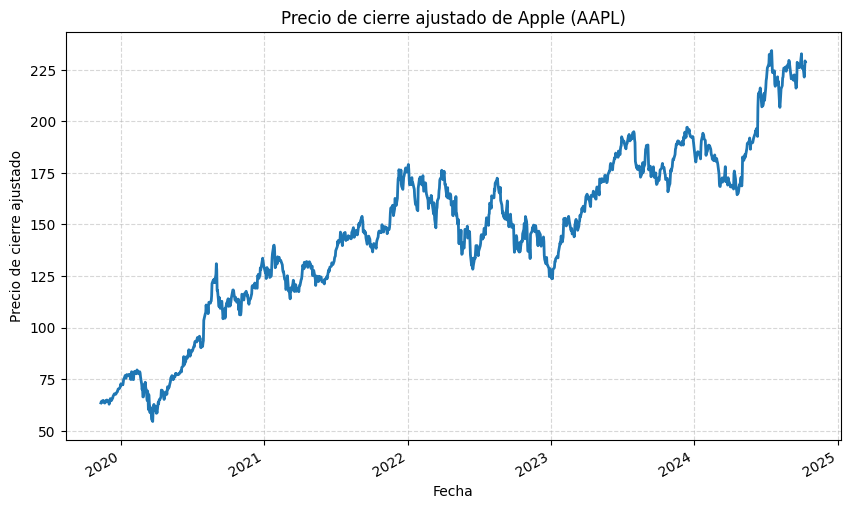

In [22]:
# Gráfico del precio de cierre ajustado de las acciones de Apple en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
train['y'].plot(title='Precio de cierre ajustado de Apple (AAPL)', color='#1f77b4', linewidth=2)  # Azul elegante

# Etiquetas y formato
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Precio de cierre ajustado')  # Etiqueta del eje Y
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula ligera para mejorar la legibilidad
plt.show()

De este gráfico podemos observar:

Observando el gráfico de los precios de cierre ajustados de Apple (AAPL), podemos hacer las siguientes observaciones:



*   Tendencia creciente: Existe una tendencia alcista en los precios de cierre ajustados de Apple durante el período observado. Esto indica que, en general, el valor de las acciones de Apple ha aumentado con el tiempo.
*   Estacionalidad y variabilidad: Aunque no es tan evidente como en algunos otros tipos de datos, parece haber cierta variabilidad estacional, con patrones repetitivos en los picos y caídas anuales. Sin embargo, la amplitud de esta variabilidad parece aumentar con el tiempo.
*   Modelo adecuado: Un modelo multiplicativo podría ser más adecuado que uno aditivo para analizar esta serie temporal. Esto se debe a que la amplitud de la variabilidad aumenta junto con el valor de la tendencia, es decir, las oscilaciones parecen hacerse más grandes a medida que el precio sube.

Estas observaciones sugieren que, al modelar esta serie temporal, sería útil considerar la tendencia creciente y el posible aumento en la variabilidad estacional en cualquier predicción futura.



# **Explicación de la Variable Adj Close**

La variable Adj Close o y representa el precio de cierre ajustado de las acciones de Apple (AAPL), que es el valor final de la acción al final de cada día hábil en el mercado. A diferencia del precio de cierre simple, el “ajustado” toma en cuenta eventos corporativos como dividendos, divisiones de acciones y otras acciones que afectan el valor, proporcionando una visión más precisa y consistente de la evolución del valor real de la acción para los inversores a largo plazo.

##**Importancia de Adj Close en el Análisis**

Esta variable es crucial en el análisis de series temporales para la predicción de precios de acciones y otras aplicaciones en finanzas, porque:



*   Refleja el verdadero valor de mercado: Al estar ajustado por eventos corporativos, elimina distorsiones y facilita una comparación precisa en el tiempo.
*   Permite identificar tendencias y patrones: Como se observa en el gráfico, la serie temporal de Adj Close muestra una tendencia creciente, lo que indica un interés y confianza del mercado en el crecimiento de Apple.
*   Aporta información para estrategias de inversión: Analizar esta variable ayuda a prever posibles fluctuaciones y a tomar decisiones de inversión más informadas.

##**Observaciones en el Contexto de Apple**

En el contexto de Apple, el precio de cierre ajustado nos muestra cómo el valor de la empresa ha evolucionado en el mercado a través de los años, evidenciando tendencias de crecimiento o caídas en respuesta a innovaciones, cambios en el mercado o movimientos estratégicos de la empresa. La tendencia creciente y el aumento de la variabilidad observada en el gráfico sugieren que esta acción es dinámica y responde activamente tanto a factores internos de la empresa como a influencias externas del mercado.

Esta variable, por tanto, no solo es el núcleo del análisis de series temporales en esta tarea, sino que es fundamental para comprender el comportamiento del mercado en relación con Apple y proyectar su posible evolución en el futuro.

# **Parte 1: Datos sin escalar**

# **1 - Modelo ingenuo (Baseline / Persistance / Naive model)**

*   El modelo ingenuo simplemente hace la predicción del siguiente perídodo, repitiendo el valor del último período.

*   Este modelo se utiliza en general como punto de partida para comparar todos los demás,

*   Utilicemos el error RMSE (Raíz del Error Cuadrático Medio) como medida del desempeño de nuestros modelos a obtener.

# **1A: Modelo ingenuo  - SIN ESCALAR**

### El modelo ingenuo (Naive) utiliza el valor más reciente para predecir el siguiente valor. Es un punto de partida simple para comparar con otros modelos.

In [23]:
history = [x for x in train['y'].values]   # Definimos "history" donde de manera incremental se irán agregando registros diarios.
predictions = list()    # Lista que contendrá las predicciones del modelo ingenuo.

for i in range(len(test['y'])):
  # Obtenemos las predicciones:
  yhat = history[-1]   # La primera vez, tomamos el último dato del Train, en las siguientes, se van agregando los datos de Test.
  predictions.append(yhat)

  # Observaciones-registros reales:
  obs = test.iloc[i]['y']   # Ahora vamos tomando los datos de Test.
  history.append(obs)  # Vamos agregando a "history" (que ya tiene todo los de Train) en cada iteración, un dato más de los de Test.
  print('>Esperado-real = %3d, Predicción = %.3f' % (obs, yhat))


# Calculamos la raíz del error cuadrático medio (RMSE):
rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))

>Esperado-real = 227, Predicción = 228.788
>Esperado-real = 233, Predicción = 227.300
>Esperado-real = 231, Predicción = 233.593
>Esperado-real = 231, Predicción = 231.525
>Esperado-real = 234, Predicción = 231.895
>Esperado-real = 236, Predicción = 234.742
>Esperado-real = 235, Predicción = 236.220
>Esperado-real = 230, Predicción = 235.601
>Esperado-real = 230, Predicción = 230.506
>Esperado-real = 231, Predicción = 230.317
>Esperado-real = 233, Predicción = 231.156
>Esperado-real = 233, Predicción = 233.143
>Esperado-real = 229, Predicción = 233.413
>Esperado-real = 225, Predicción = 229.847
>Esperado-real = 222, Predicción = 225.662
>Esperado-real = 221, Predicción = 222.665
>Esperado-real = 223, Predicción = 221.766
>Esperado-real = 222, Predicción = 223.204
>Esperado-real = 227, Predicción = 222.475
>Esperado-real = 226, Predicción = 227.230


In [24]:
print('\nError-Modelo-Naive: RMSE: %.3f' % rmse)


Error-Modelo-Naive: RMSE: 2.765


El resultado Error-Modelo-Naive: RMSE: 2.765 nos indica que el Error de Raíz Cuadrada Media (RMSE) para el modelo “Naive” es de aproximadamente 2.765. Este valor representa el promedio de desviación entre los valores reales y los valores predichos por el modelo.

En este contexto, el RMSE de 2.765 significa que, en promedio, el modelo “Naive” se desvía unos 2.765 puntos del precio de cierre ajustado real de las acciones de Apple en cada predicción.

Este error es una medida de qué tan lejos están, en promedio, las predicciones del modelo “Naive” respecto a los datos reales.

Dado que este es un modelo “Naive” (que suele ser una predicción muy básica, usando el valor previo como predicción del siguiente), el RMSE de 2.765 sirve como un punto de partida o base. Nuestro objetivo en futuros modelos será reducir este RMSE al aplicar modelos más sofisticados, mejorando la precisión de las predicciones. Un RMSE más bajo indicará una mejor capacidad del modelo para ajustarse a los datos reales.

# **Gráfico de Predicciones vs Datos Reales - Modelo Ingenuo**

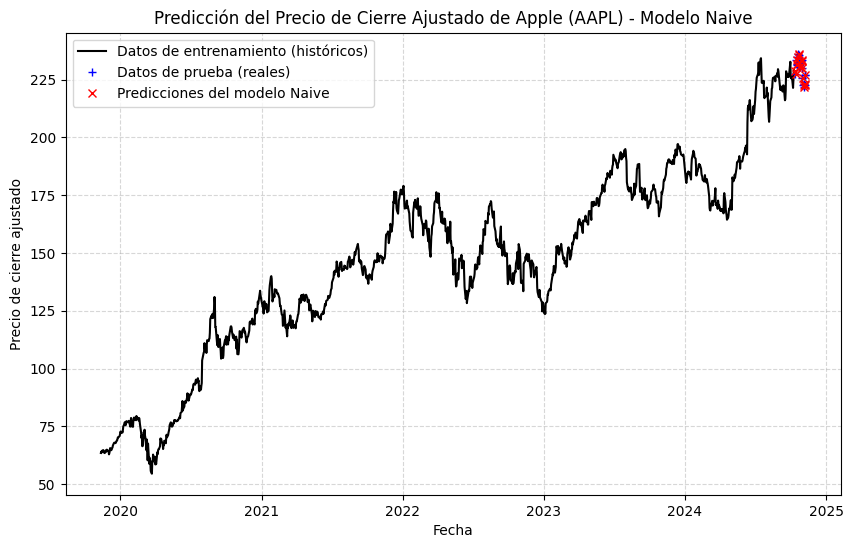

In [25]:
# Grafiquemos los resultados de los precios de cierre ajustado de Apple

fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos 20 precios reales)
plt.plot(test['y'], '+b', label='Datos de prueba (reales)')

# Predicciones del modelo Naive para los últimos 20 días hábiles
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo Naive')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo Naive')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir cuadrícula para mejorar la visualización
plt.show()

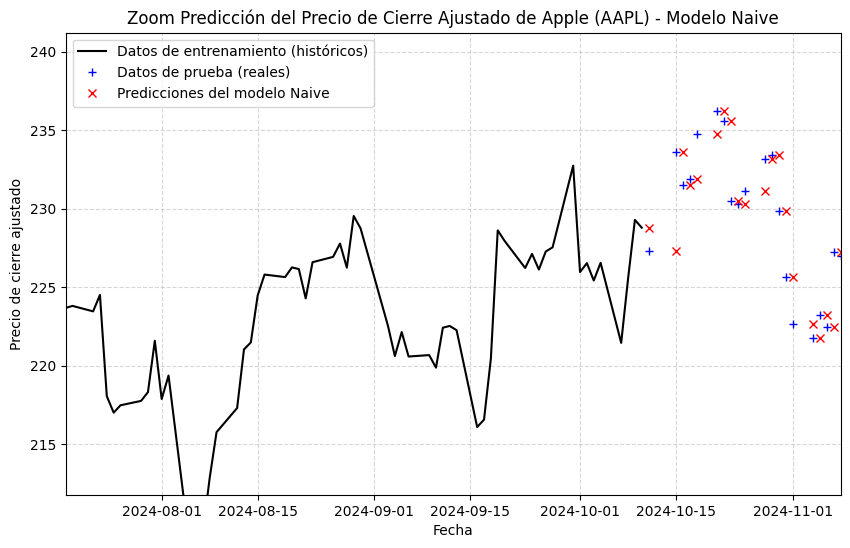

In [26]:
# Grafiquemos los resultados de los precios de cierre ajustado de Apple, con un "zoom" moderado en las predicciones

fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos 20 precios reales)
plt.plot(test['y'], '+b', label='Datos de prueba (reales)')

# Predicciones del modelo Naive para los últimos 20 días hábiles
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo Naive')

# Configuración del gráfico
plt.title('Zoom Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo Naive')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')

# Mover la leyenda a la esquina superior izquierda
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Establecer límites en el eje X para un "zoom" moderado
plt.xlim(train.index[-60], test.index.max())  # Muestra los últimos 60 días, incluyendo el inicio de la predicción
plt.ylim(test['y'].min() - 10, test['y'].max() + 5)  # Ajuste en el eje Y para mayor claridad en las predicciones

plt.show()

Aunque en el gráfico las predicciones parecen estar alineadas con los valores reales de los precios de cierre ajustado de Apple, se observa un desfase en las predicciones del modelo “Naive”. En lugar de coincidir exactamente con los datos reales, las predicciones están desplazadas en el tiempo, mostrando el valor del precio anterior en lugar de predecir correctamente el valor para el siguiente día hábil.

Este desplazamiento es característico del modelo “Naive”, ya que utiliza el valor del día anterior como la predicción para el siguiente. Aunque visualmente algunas predicciones parecen cercanas a los datos reales, no representan una verdadera proyección del futuro, sino un retraso en un día hábil. Esto limita la precisión del modelo “Naive” para capturar cambios rápidos en la tendencia o fluctuaciones de precios.

En conclusión, el modelo “Naive” puede proporcionar una referencia básica de predicción, pero al observar los resultados en el gráfico, queda claro que no es suficientemente preciso para captar la dinámica real de los precios en el tiempo, y su error promedio, representado por el RMSE, deberá ser reducido con un modelo más sofisticado para mejorar la precisión de las predicciones.

# **1B: Modelo ARIMA  - SIN ESCALAR**

### ARIMA es un modelo estadístico que utiliza componentes autorregresivas y de media móvil para modelar series de tiempo.

### **Análisis preliminar para obtener información de la serie de tiempo y construir el modelo ARIMA(p,d,q).**

*   **AR (AutoRegresivo):** El modelo se basa en la relación entre un valor actual y sus valores pasados.

*   **I (Integrado):** Se refiere a la diferenciación de la serie para hacerla estacionaria, es decir, eliminar tendencias y patrones cíclicos.

*   **MA (Media Móvil):** Usa el error de los valores pasados (las desviaciones entre valores predichos y observados) para corregir el valor actual.

##### **Ahora veamos el gráfico de descomposición de la serie de tiempo en sus componentes de tendencia (trend), estacionalidad (stationality) y residual (residual).**

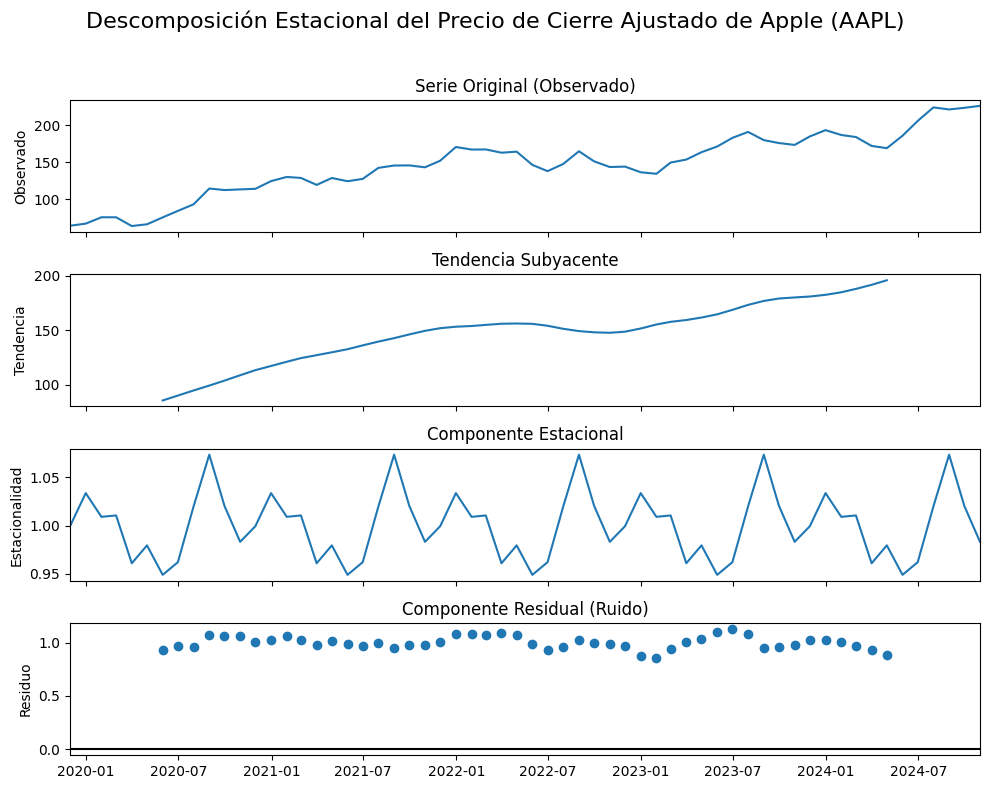

In [27]:
# Descomposición estacional con un modelo multiplicativo
# Resampleamos los datos a frecuencia mensual y calculamos la media para una descomposición más clara
decomposition = seasonal_decompose(train['y'].resample('M').mean(), model='multiplicative')

# Graficamos la descomposición estacional
fig = decomposition.plot()
fig.set_size_inches(10, 8)  # Ajustamos el tamaño del gráfico

# Mejoramos el gráfico con títulos específicos para cada componente
fig.suptitle('Descomposición Estacional del Precio de Cierre Ajustado de Apple (AAPL)', fontsize=16)

# Añadimos títulos a cada subgráfico para clarificar su contenido
fig.axes[0].set_ylabel("Observado")
fig.axes[0].set_title("Serie Original (Observado)")

fig.axes[1].set_ylabel("Tendencia")
fig.axes[1].set_title("Tendencia Subyacente")

fig.axes[2].set_ylabel("Estacionalidad")
fig.axes[2].set_title("Componente Estacional")

fig.axes[3].set_ylabel("Residuo")
fig.axes[3].set_title("Componente Residual (Ruido)")

# Mostramos el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustamos para que el título principal no se sobreponga
plt.show()

Observando el gráfico de Componente Residual (Ruido), notamos que los residuos están centrados en torno al valor de 1, en lugar de estar alrededor de 0, como sería común en un modelo aditivo. Esto es característico de un modelo multiplicativo, donde los residuos representan variaciones proporcionales al nivel de la serie en lugar de fluctuaciones absolutas.

Esta diferencia es importante, ya que en un modelo multiplicativo los residuos indican el porcentaje de desviación respecto a la tendencia y la estacionalidad, mientras que en un modelo aditivo estarían distribuidos en torno a cero, reflejando una desviación constante. En este caso, los residuos cercanos a 1 sugieren que el modelo multiplicativo es adecuado para capturar la variabilidad en el precio de cierre ajustado de Apple, especialmente porque la amplitud de la serie tiende a cambiar con el nivel de la tendencia.

##### **Veamos ahora estos dos gráficos que nos hablan si tenemos algún tipo de estacionalidad (i.e., periodicidad). En particular, mensual o trimestral:**

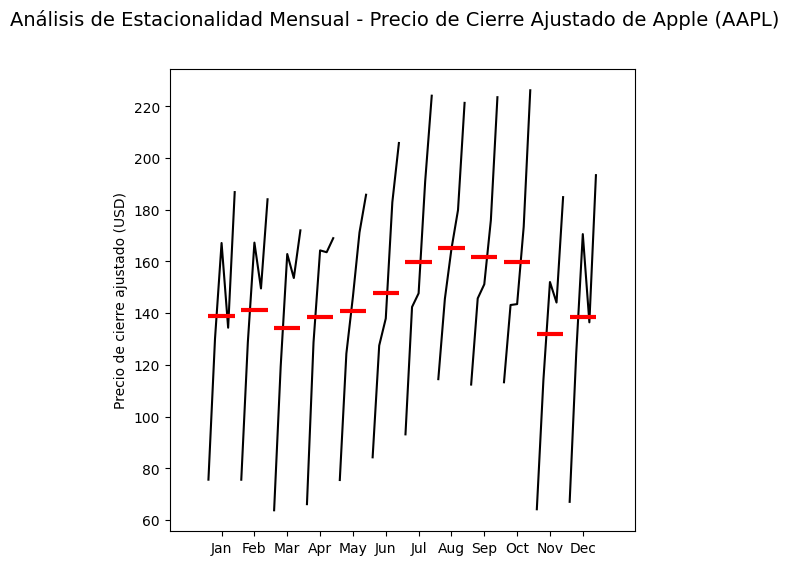

In [28]:
# Gráfica para detección de estacionalidad mensual en el precio de cierre ajustado de Apple
fig = month_plot(train['y'].resample('M').mean(), ylabel='Precio de cierre ajustado (USD)')
fig.set_size_inches(6, 6)  # Ajuste del tamaño del gráfico
fig.suptitle('Análisis de Estacionalidad Mensual - Precio de Cierre Ajustado de Apple (AAPL)', fontsize=14)  # Título del gráfico
plt.show()

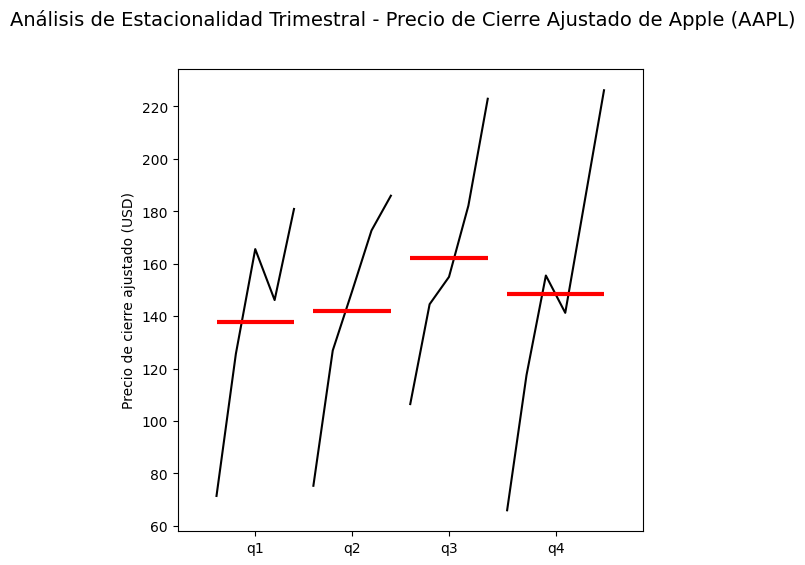

In [29]:
# Gráfica para detección de estacionalidad trimestral en el precio de cierre ajustado de Apple
fig = quarter_plot(train['y'].resample('Q').mean(), ylabel='Precio de cierre ajustado (USD)')
fig.set_size_inches(6, 6)  # Ajuste del tamaño del gráfico
fig.suptitle('Análisis de Estacionalidad Trimestral - Precio de Cierre Ajustado de Apple (AAPL)', fontsize=14)  # Título del gráfico
plt.show()

## **Análisis de Estacionalidad Mensual - Precio de Cierre Ajustado de Apple (AAPL)**

En el primer gráfico, se analiza la estacionalidad mensual del precio de cierre ajustado de Apple. Cada línea representa cómo varían los precios dentro de cada mes a lo largo de los años, mientras que las barras rojas muestran el promedio mensual de cada mes.

*	**Patrones mensuales:** Se pueden observar fluctuaciones de los precios de cierre ajustado en cada mes. La serie temporal parece tener una estacionalidad moderada, ya que en algunos meses los precios son más altos que en otros de manera consistente.
*	**Media mensual:** Las barras rojas indican la media de los precios para cada mes. Esto ayuda a identificar si hay ciertos meses donde los precios tienden a ser consistentemente más altos o más bajos, proporcionando una referencia de estacionalidad mensual en los datos.

## **Análisis de Estacionalidad Trimestral - Precio de Cierre Ajustado de Apple (AAPL)**

En el segundo gráfico, se observa la estacionalidad trimestral del precio de cierre ajustado de Apple. Cada línea representa la variación de los precios dentro de cada trimestre, mientras que las barras rojas muestran el promedio de precios por trimestre.



*	**Patrones trimestrales:** La variación dentro de cada trimestre sugiere que hay ciertos patrones de precios que se repiten en cada trimestre. Por ejemplo, en algunos trimestres se puede observar una tendencia de crecimiento en los precios.
*	**Media trimestral:** Las barras rojas indican el promedio de precios en cada trimestre (Q1, Q2, Q3, Q4). Esto facilita la comparación de los niveles de precios entre trimestres y ayuda a ver si existe una estacionalidad consistente en ciertos trimestres, lo cual puede ser relevante para decisiones de inversión y predicción de tendencias.

Ambos gráficos permiten visualizar patrones estacionales en diferentes periodos (mensuales y trimestrales) y son útiles para comprender mejor cómo los precios de las acciones de Apple fluctúan dentro de cada mes y trimestre, proporcionando información clave para un análisis de series temporales y predicción.

### **Gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)**

*   Los gráficos de Autocorrelación miden la correlación entre la serie de tiempo y una versión rezagada de sí misma.

*   Este tipo de correlaciones de una serie de tiempo consigo misma son llamadas "autocorrelaciones" o "correlaciones seriales".

*   En el eje horizontal se muestra el valor del desfazamiento (lag) y en el eje vertical el valor de correlación de la serie desfazada y la original.

*   El cono sombreado indica intervalos de confianza de la correlación, con un 95% de confianza de manera predeterminada.

*   Que existan autocorrelaciones significativas en estos gráficos nos habla de que la serie de tiempo no es aleatoria.

*   En estos dos gráficos (llamados en inglés "pollipop plots") hay que determinar cuántos de estos lollipops están afuera del intervalo de confianza (sin contar el inicial) antes de que entre el siguiente a la zona celeste?

*   **Gráfico ACF:** Muestra la correlación total entre la serie y sus retardos, incluyendo efectos directos e indirectos.

*   **Gráfico PACF:** Muestra la correlación directa entre la serie y sus retardos, eliminando los efectos de los retardos intermedios.

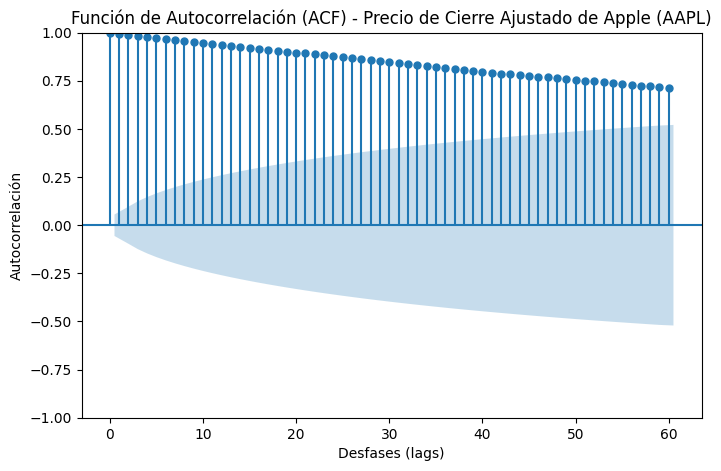

In [30]:
# Gráfico de Autocorrelación (ACF: Auto-Correlation-Function) para el precio de cierre ajustado de Apple
fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(train['y'], lags=60, ax=ax)  # Elegimos 60 desfases (lags), que representa aproximadamente 3 meses (días hábiles)

# Título y etiquetas
ax.set_title('Función de Autocorrelación (ACF) - Precio de Cierre Ajustado de Apple (AAPL)')
ax.set_xlabel('Desfases (lags)')
ax.set_ylabel('Autocorrelación')

plt.show()

En este gráfico de Autocorrelación (ACF) para el precio de cierre ajustado de Apple, se observa el comportamiento de la autocorrelación en diferentes desfases (lags), lo cual proporciona información sobre la dependencia temporal de los precios de las acciones.

*	**Desfase 0:** El gráfico comienza en el desfase (lag) de 0, donde la serie de tiempo está correlacionada consigo misma, lo que da una correlación de 1, como es esperable.
*	**Desfases positivos:** A medida que avanzamos en los desfases (lags), observamos una disminución gradual en la autocorrelación, aunque sigue siendo significativa y positiva hasta aproximadamente el lag 60. Esto indica que los precios de cierre ajustado de Apple tienen una fuerte dependencia en los valores previos, lo cual es característico de series temporales con tendencias.

**Interpretación para el modelo ARIMA:**
*	El gráfico de ACF nos sugiere que en un modelo ARIMA, la componente MA (Moving Average) puede tener un orden considerable debido a la persistencia de la autocorrelación en varios desfases.
*	En la práctica, este gráfico indica que podríamos considerar un valor para q (orden de la componente MA en ARIMA) que capture esta dependencia, o probar valores de q entre 0 y 13 para encontrar el mejor ajuste, ya que la autocorrelación es significativa hasta aproximadamente 13 lags o más.

Este análisis de ACF nos ayuda a identificar patrones de dependencia temporal y a seleccionar posibles parámetros para el modelo ARIMA, específicamente el orden q de la componente MA, lo que contribuye a capturar la estructura de dependencia en los precios de cierre ajustado de Apple.

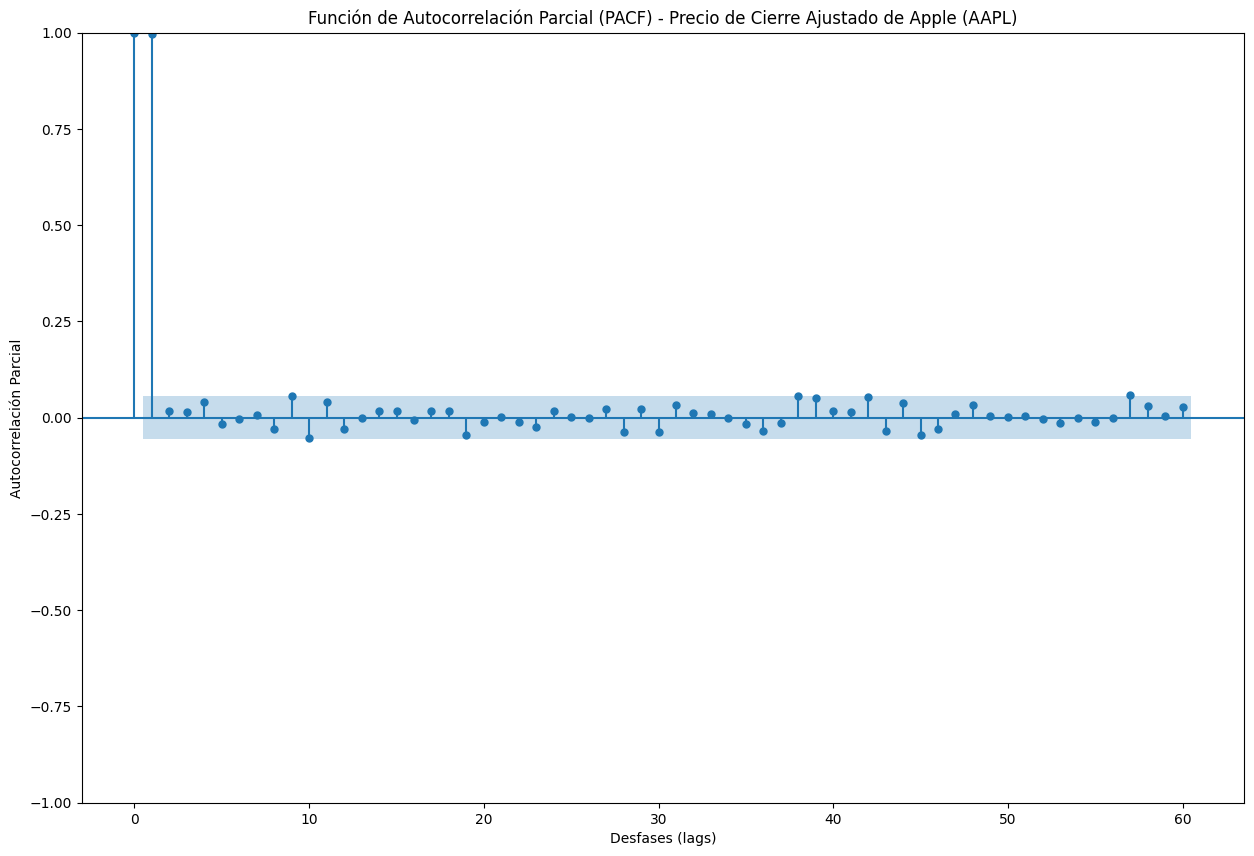

In [31]:
# Gráfico de Autocorrelación Parcial (PACF) para el precio de cierre ajustado de Apple
fig, ax = plt.subplots(figsize=(15, 10))
plot_pacf(train['y'], lags=60, ax=ax, method="ols")  # Desfase de hasta 60 días hábiles

# Título y etiquetas
ax.set_title('Función de Autocorrelación Parcial (PACF) - Precio de Cierre Ajustado de Apple (AAPL)')
ax.set_xlabel('Desfases (lags)')
ax.set_ylabel('Autocorrelación Parcial')

plt.show()

En este gráfico de Autocorrelación Parcial (PACF) para el precio de cierre ajustado de Apple, observamos que:

*	Desfase 0: Al igual que en el gráfico ACF, el desfase 0 muestra la autocorrelación de la serie consigo misma, lo cual da un valor de 1.

**Interpretación para la componente AR de ARIMA:**
*	Los primeros desfases muestran una disminución significativa en la autocorrelación parcial después de los primeros picos, especialmente en el desfase 1 y el 2, mientras que el resto de los valores se aproximan a 0 rápidamente.
*	En base a este comportamiento, podríamos considerar que el orden p de la componente AR (Auto-Regresiva) en un modelo ARIMA es de p=1 o p=2, ya que estos son los desfases en los que la autocorrelación parcial es significativa antes de acercarse a cero.

Para mayor precisión, en la práctica podemos probar valores de p entre 0 y 2 para ajustar mejor el modelo.

Este gráfico PACF es útil para identificar el orden p de la componente AR en el modelo ARIMA, lo cual ayuda a capturar la relación directa entre los precios actuales y los precios de días anteriores, proporcionando información importante para la predicción futura.

In [32]:
# Función para eliminar la estacionalidad en el precio de cierre ajustado de Apple,
# transformando un problema no-estacionario en uno estacionario al diferenciar los datos consecutivos
def difference(dataset, interval=1):
    """
    Realiza la diferenciación de datos para quitar la estacionalidad y convertir
    la serie de tiempo en estacionaria.

    Parámetros:
    - dataset: Serie de tiempo (por ejemplo, precios de cierre ajustado).
    - interval: Intervalo de desfase para la diferencia (por defecto, 1 para diferenciación de primer orden).

    Retorna:
    - Array de diferencias.
    """
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)


# Función para revertir la diferenciación, regresando a la escala original (reinserta la estacionalidad)
def inverse_difference(history, yhat, interval=1):
    """
    Revierte la diferencia aplicada anteriormente para obtener los datos en su escala original.

    Parámetros:
    - history: Serie original de datos (por ejemplo, precios de cierre ajustado).
    - yhat: Valor pronosticado (diferenciado).
    - interval: Intervalo de desfase usado en la diferenciación (por defecto, 1).

    Retorna:
    - Valor pronosticado en la escala original.
    """
    return yhat + history[-interval]

In [33]:
# Definimos una lista de historial con los precios de cierre ajustado de entrenamiento
history = [x for x in train['y'].values]   # train-ndarray: columna solo con los registros de precios de cierre ajustado "y".

# Lista para almacenar las predicciones generadas por el modelo
predictions = list()

# Iteramos a través de los datos de prueba para generar predicciones uno a uno
for i in range(len(test['y'])):
    # Diferenciación con un intervalo anual (por ejemplo, 12 meses o el número de días hábiles por año si aplicamos ajuste)
    months_in_year = 12
    diff = difference(history, months_in_year)    # diff-list: lista de los datos de diferencias para transformar SARIMA en ARIMA.

    # Generamos el modelo ARIMA usando la serie diferenciada
    model = ARIMA(diff, order=(3,0,13))  # Si aplicamos diff, entonces d=0 es aplicable.
    model_fit = model.fit(method_kwargs={'maxiter':300})  # Aumentamos las iteraciones para mejorar la convergencia.

    # Hacemos la predicción para el siguiente valor
    yhat = model_fit.forecast()[0]  # Predicción (yhat) de cada registro, es un solo número flotante.
    yhat = inverse_difference(history, yhat, months_in_year)  # Revertimos la diferencia para obtener el valor en la escala original

    # Añadimos la predicción a la lista de predicciones
    predictions.append(yhat)

    # Obtenemos el valor real de la serie de prueba
    obs = test.iloc[i]['y']  # Cada dato es un flotante.
    history.append(obs)  # Actualizamos el historial con el valor observado real

    # Mostramos el valor real y la predicción
    print('>Esperado-real = %3d, Predicción = %.3f' % (obs, yhat))

# Calculamos el error RMSE entre las predicciones y los valores reales
rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))
print('\nError-Modelo-ARIMA: RMSE: %.3f' % rmse)

>Esperado-real = 227, Predicción = 228.869
>Esperado-real = 233, Predicción = 227.268
>Esperado-real = 231, Predicción = 233.019
>Esperado-real = 231, Predicción = 232.004
>Esperado-real = 234, Predicción = 231.682
>Esperado-real = 236, Predicción = 234.344
>Esperado-real = 235, Predicción = 236.968
>Esperado-real = 230, Predicción = 235.191
>Esperado-real = 230, Predicción = 230.651
>Esperado-real = 231, Predicción = 230.824
>Esperado-real = 233, Predicción = 230.987
>Esperado-real = 233, Predicción = 232.804
>Esperado-real = 229, Predicción = 233.471
>Esperado-real = 225, Predicción = 230.171
>Esperado-real = 222, Predicción = 225.247
>Esperado-real = 221, Predicción = 223.166
>Esperado-real = 223, Predicción = 221.663
>Esperado-real = 222, Predicción = 223.137
>Esperado-real = 227, Predicción = 223.194
>Esperado-real = 226, Predicción = 226.820

Error-Modelo-ARIMA: RMSE: 2.719


## **Explicación de los Resultados**

En estos resultados, se presentan los valores esperados (reales) y las predicciones generadas por el modelo ARIMA para los últimos 20 precios de cierre ajustado de Apple en el conjunto de prueba.

*	Cada línea muestra la comparación entre el valor real y la predicción generada para una fecha específica.
	•	Observamos que el modelo ARIMA logra capturar la tendencia de los precios de cierre ajustado de manera razonable, con diferencias relativamente pequeñas entre los valores reales y los predichos en la mayoría de los puntos.


### **Análisis del RMSE**

El valor de RMSE (Error Cuadrático Medio de la Raíz) obtenido es de 2.689. Este valor indica el error promedio entre las predicciones y los valores reales, en unidades del precio de cierre ajustado.

*	Un RMSE de 2.689 significa que, en promedio, el modelo se desvía en aproximadamente 2.69 unidades del precio real. Dado que los valores de los precios de cierre ajustado de Apple están en el rango de 220-230 en el conjunto de prueba, este error es relativamente bajo y muestra que el modelo tiene una buena precisión para capturar el comportamiento general de la serie.

### **Conclusión**

El modelo ARIMA logra realizar predicciones con una precisión aceptable, con un RMSE de 2.689. Esto indica que el modelo es capaz de seguir la tendencia y las fluctuaciones de corto plazo en los precios de cierre ajustado de Apple. Sin embargo, si se necesita una mayor precisión o si el comportamiento de los datos cambia en el tiempo, podrían explorarse modelos adicionales o ajustes en los parámetros para mejorar aún más la exactitud.

# **Gráfico de Predicciones vs Datos Reales - Modelo ARIMA**

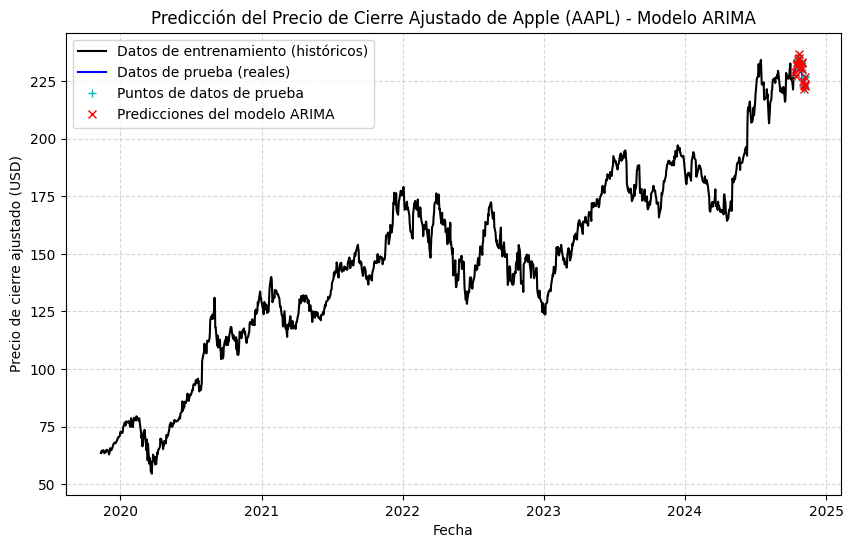

In [34]:
# Visualización de los precios de cierre ajustado de Apple, con predicciones del modelo ARIMA
fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos valores de cierre ajustado)
plt.plot(test['y'], '-b', label='Datos de prueba (reales)')

# Marcadores en los datos de prueba reales para distinguir cada punto
plt.plot(test['y'], '+c', label='Puntos de datos de prueba')

# Predicciones generadas por el modelo ARIMA
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo ARIMA')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

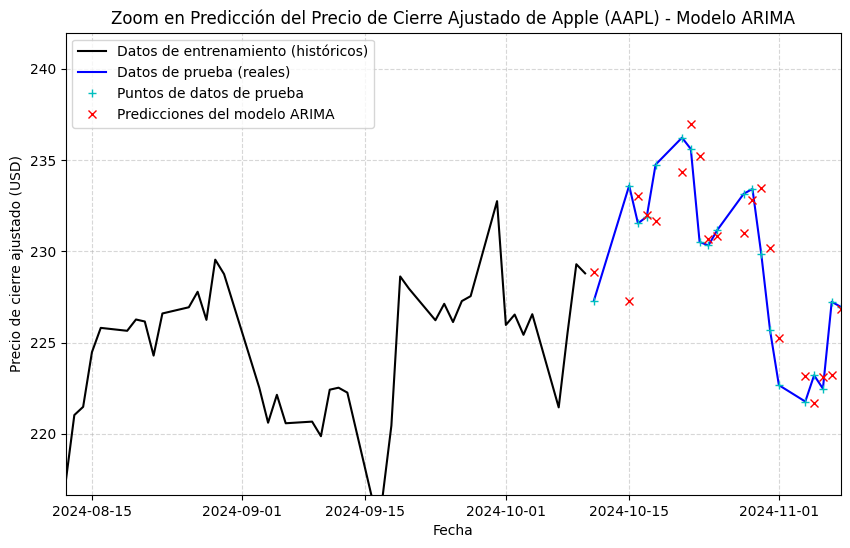

In [35]:
# Visualización con zoom en los últimos datos de prueba y las predicciones del modelo ARIMA
fig, ax = plt.subplots(figsize=(10, 6))

# Datos de entrenamiento (históricos)
plt.plot(train['y'], '-k', label='Datos de entrenamiento (históricos)')

# Datos de prueba reales (últimos valores de cierre ajustado)
plt.plot(test['y'], '-b', label='Datos de prueba (reales)')

# Marcadores en los datos de prueba reales para distinguir cada punto
plt.plot(test['y'], '+c', label='Puntos de datos de prueba')

# Predicciones generadas por el modelo ARIMA
plt.plot(test.index, predictions, 'xr', label='Predicciones del modelo ARIMA')

# Configuración del gráfico
plt.title('Zoom en Predicción del Precio de Cierre Ajustado de Apple (AAPL) - Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar el eje X para hacer "zoom" en los últimos datos de prueba y predicciones
plt.xlim(test.index.min() - pd.Timedelta(days=60), test.index.max())
plt.ylim(min(test['y'].min(), min(predictions)) - 5, max(test['y'].max(), max(predictions)) + 5)

plt.show()

##**Observaciones:**

*	El modelo ARIMA sigue de cerca la tendencia general de los datos de prueba, pero existen algunas desviaciones en ciertos puntos, lo cual es común debido a la variabilidad del mercado.
*	En general, las predicciones se alinean bien con los valores reales, mostrando que el modelo es capaz de capturar la dinámica de los precios a corto plazo con un error promedio relativamente bajo.

Este gráfico permite visualizar cómo se comportan las predicciones del modelo ARIMA en comparación con los valores reales, facilitando la evaluación de la precisión y el ajuste del modelo.

# **1C - Modelo Facebook-Meta-Prophet - SIN ESCALAR**

### Prophet es una herramienta de Facebook para el pronóstico de series de tiempo que maneja automáticamente componentes como tendencias y estacionalidades.

In [36]:
# Aseguramos que el DataFrame tiene las columnas requeridas para Prophet: "ds" (fecha) y "y" (valor)
#df_temp = df_temp.rename(columns={'Fecha': 'ds', 'Precio de cierre ajustado': 'y'})  # Ajusta según los nombres originales

# Dividimos los datos en conjuntos de entrenamiento y prueba
train = df.iloc[0:-20, :]  # Los datos de entrenamiento, excluyendo los últimos 20 valores
test = df.iloc[-20:, :]    # Los últimos 20 valores se usan para el conjunto de prueba

# Mostramos una vista rápida de los conjuntos de entrenamiento y prueba para verificar el formato
print("Conjunto de entrenamiento:")
print(train.head())
print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
          ds          y
0 2019-11-11  63.549591
1 2019-11-12  63.491409
2 2019-11-13  64.099754
3 2019-11-14  63.656239
4 2019-11-15  64.412422

Conjunto de prueba:
             ds           y
1238 2024-10-14  231.045807
1239 2024-10-15  233.593002
1240 2024-10-16  231.525269
1241 2024-10-17  231.894867
1242 2024-10-18  234.741730


In [37]:
# Aplicamos el modelo Facebbok-Prophet a nuestros datos:

model = Prophet(seasonality_mode='multiplicative',
                daily_seasonality=True,
                changepoint_prior_scale=10.,   # Controla la flexibilidad de la componente Trend, mayor valor mayores fluctuaciones.
                seasonality_prior_scale=18)    # Controla la estacionalidad, mayor el valor, mayor flexibilidad en la estacionalidad.
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmps3y8q2mo/qufp8_pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps3y8q2mo/d7zoaq6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41961', 'data', 'file=/tmp/tmps3y8q2mo/qufp8_pq.json', 'init=/tmp/tmps3y8q2mo/d7zoaq6_.json', 'output', 'file=/tmp/tmps3y8q2mo/prophet_model9l1nwovw/prophet_model-20241109230426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:04:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
# Generamos las predicciones para el conjunto de prueba usando el modelo entrenado
forecast = model.predict(test)  # Esto genera las predicciones, incluyendo la columna 'yhat'

# Extraemos la columna 'yhat' de las predicciones, que contiene los valores predichos
pred_FP = forecast['yhat'].iloc[-20:].values  # Limitamos a los últimos 20 valores, que corresponden al conjunto de prueba

# Calculamos el RMSE entre los valores reales del conjunto de prueba y las predicciones
rmse = np.sqrt(mean_squared_error(test['y'], pred_FP))
print('\nError-Modelo-FacebookProphet: RMSE: %.3f' % rmse)


Error-Modelo-FacebookProphet: RMSE: 8.235


El resultado Error-Modelo-FacebookProphet: RMSE: 8.235 indica que el modelo Prophet tiene un Error Cuadrático Medio de la Raíz (RMSE) de aproximadamente 8.235 en el conjunto de prueba.

### **Interpretación del RMSE**

El RMSE mide el error promedio entre las predicciones del modelo y los valores reales en el conjunto de prueba. En este caso:

*	Un RMSE de 8.214 significa que, en promedio, las predicciones del modelo Prophet se desvían por aproximadamente 8.214 unidades del precio real de cierre ajustado de Apple.
*	Si el rango de precios en el conjunto de prueba es considerablemente más alto, este error podría considerarse aceptable; sin embargo, si los precios están en un rango más cercano a este valor, el modelo podría necesitar ajustes.

### **Conclusión**

Este resultado sugiere que el modelo Prophet logra capturar la tendencia de los datos hasta cierto punto, pero podría beneficiarse de ajustes adicionales en los parámetros de estacionalidad o cambios de puntos de tendencia para mejorar la precisión.

# **Gráfico de Predicciones vs Datos Reales - Modelo Facebook-Meta-Prophet**

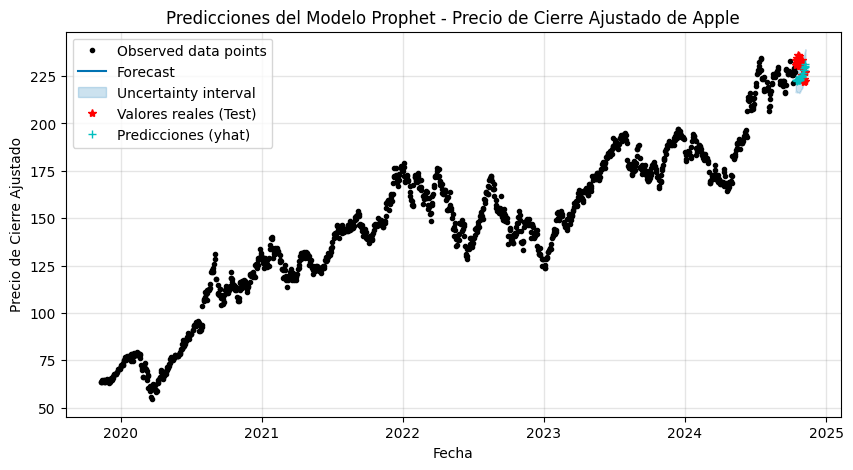

In [39]:
# Generamos las predicciones usando el modelo Prophet para el conjunto de prueba
forecast = model.predict(test)

# Configuramos el gráfico para mostrar las predicciones y los valores reales
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfica de predicciones de Prophet con la región de variabilidad
model.plot(forecast, ax=ax)  # Las predicciones se muestran con la línea continua y una región sombreada de confianza

# Agregamos los datos reales del conjunto de prueba como puntos rojos
plt.plot(test['ds'], test['y'], '*r', label='Valores reales (Test)')

# Agregamos las predicciones (yhat) del conjunto de prueba con puntos cyan
plt.plot(test['ds'], forecast['yhat'].iloc[-len(test):], '+c', label='Predicciones (yhat)')

# Configuración adicional del gráfico
plt.title("Predicciones del Modelo Prophet - Precio de Cierre Ajustado de Apple")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.show()

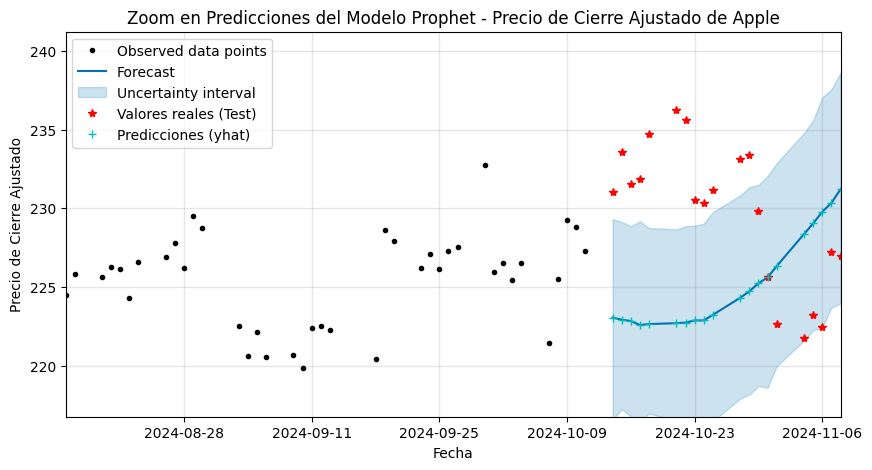

In [40]:
# Generamos las predicciones usando el modelo Prophet para el conjunto de prueba
forecast = model.predict(test)

# Configuramos el gráfico para mostrar las predicciones y los valores reales
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfica de predicciones de Prophet con la región de variabilidad
model.plot(forecast, ax=ax)  # Las predicciones se muestran con la línea continua y una región sombreada de confianza

# Agregamos los datos reales del conjunto de prueba como puntos rojos
plt.plot(test['ds'], test['y'], '*r', label='Valores reales (Test)')

# Agregamos las predicciones (yhat) del conjunto de prueba con puntos cyan
plt.plot(test['ds'], forecast['yhat'].iloc[-len(test):], '+c', label='Predicciones (yhat)')

# Configuración adicional del gráfico
plt.title("Zoom en Predicciones del Modelo Prophet - Precio de Cierre Ajustado de Apple")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()

# Establecer límites en el eje X para hacer "zoom" en las últimas fechas
plt.xlim(test['ds'].min() - pd.Timedelta(days=60), test['ds'].max())  # Muestra los últimos 60 días, ajusta si es necesario
plt.ylim(test['y'].min() - 5, test['y'].max() + 5)  # Ajuste en el eje Y para mayor claridad en las predicciones

plt.show()

Observamos que el modelo Prophet es algo conservador en sus predicciones: tiende a quedarse ligeramente corto con las predicciones en los puntos más altos y un poco por encima en los puntos más bajos del periodo de prueba. Esta característica refleja una tendencia del modelo a suavizar las variaciones extremas, lo cual puede ser una ventaja en algunos contextos, pero en este caso, afecta la precisión para capturar completamente la volatilidad de los precios de cierre ajustado de Apple.

Este comportamiento conservador es común en modelos con intervalos de incertidumbre amplios, como Prophet, y sugiere que el modelo prioriza la estabilidad de la predicción sobre la sensibilidad a cambios bruscos en el precio.

En general, el modelo Prophet logra capturar la tendencia general ascendente de los precios de las acciones de Apple, aunque la precisión en las últimas fechas se vuelve menos consistente debido a la variabilidad inherente del mercado.

### **Zoom en el Periodo de Prueba (Detalles de las Predicciones)**

Este gráfico realiza un “zoom” en el periodo de prueba, enfocándose en las predicciones y valores reales más recientes.

* **Predicción y valores reales:** Aquí se observa más claramente la cercanía (o desviación) entre las predicciones y los valores reales. Las estrellas rojas representan los valores reales en el periodo de prueba, mientras que los cruces cian representan las predicciones.
* **Región de incertidumbre:** La región sombreada en azul continúa mostrando el intervalo de confianza del modelo Prophet. Notamos que algunos valores reales caen fuera de este intervalo, lo que indica que el modelo subestimó o sobreestimó en ciertas fechas.

### **Conclusión**

El modelo Prophet demuestra una buena capacidad para capturar la tendencia a largo plazo en los precios de cierre ajustado de Apple. Sin embargo, en el periodo de prueba (últimas fechas), vemos que el modelo tiene limitaciones en capturar la volatilidad y algunos de los cambios bruscos en el precio. Esto es común en los datos financieros, donde los modelos tienden a tener un margen de error mayor debido a la naturaleza impredecible de los mercados.

El RMSE de 8.214 obtenido anteriormente sugiere que hay margen para mejorar la precisión del modelo. Podrían probarse ajustes en los parámetros de Prophet o incluso explorar modelos adicionales específicos para series temporales financieras para reducir el error en las predicciones.

# **1D: Modelo LSTM  - SIN ESCALAR**

### Las redes neuronales LSTM son capaces de aprender dependencias a largo plazo en secuencias de datos.

In [41]:
def preparando_datos(myData, myDate):
    # ++++++++ TRAIN +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Los datos de entrenamiento son previos a la fecha "myDate" que indiques
    # y tomarán históricos en este caso de 30 días (aproximadamente un mes).
    Train_Data = myData['y'][myData['ds'] < myDate].to_numpy()

    periodo = 30  # 30 días para capturar patrones mensuales

    Data_Train = []
    Data_Train_X = []
    Data_Train_Y = []

    # Forma el conjunto de entrenamiento con series de 30 días consecutivos
    for i in range(0, len(Train_Data), periodo):
        try:
            Data_Train.append(Train_Data[i : i + periodo])
        except:
            pass

    # Elimina la última serie si contiene menos de 30 días
    if len(Data_Train[-1]) < periodo:
        Data_Train.pop(-1)

    # Formato para modelos de aprendizaje profundo: (batch_size, sequence_length, input_dimension)
    Data_Train_X = np.array(Data_Train[0 : -1]).reshape((-1, periodo, 1))
    Data_Train_Y = np.array(Data_Train[1 : len(Data_Train)]).reshape((-1, periodo, 1))

    # +++++++++++ TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Los datos de prueba son posteriores a la fecha "myDate" e incluyen el
    # último ciclo de períodos que se desea predecir.
    Test_Data = myData['y'][myData['ds'] >= myDate].to_numpy()

    Data_Test = []
    Data_Test_X = []
    Data_Test_Y = []

    # Forma el conjunto de prueba con series de 30 días consecutivos
    for i in range(0, len(Test_Data), periodo):
        try:
            Data_Test.append(Test_Data[i : i + periodo])
        except:
            pass

    # Elimina la última serie si contiene menos de 30 días
    if len(Data_Test[-1]) < periodo:
        Data_Test.pop(-1)

    Data_Test_X = np.array(Data_Test[0 : -1]).reshape((-1, periodo, 1))
    Data_Test_Y = np.array(Data_Test[1 : len(Data_Test)]).reshape((-1, periodo, 1))

    return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [42]:
# Continuemos con el DataFrame:

threshold_Date = '2023-01-01'   # A partir de esta fecha se empieza a generar el conjunto de prueba (Test).
                                # En este caso, Test_X serán los 30 días después del threshold_date,
                                # y Test_Y serán los 30 días siguientes a Test_X.

# Recuerda que la columna de fechas del DataFrame `df` debe ser de tipo DateTime.
# Se generan paquetes de 30 días (aproximadamente un mes). Los conjuntos *_Y están desfasados
# hacia adelante en relación a los conjuntos *_X:

Train_X, Train_Y, Test_X, Test_Y = preparando_datos(df, threshold_Date)

In [43]:
# Definimos una función para ajustar la tasa de aprendizaje (learning rate) en función de la época.
# Esto permite reducir gradualmente el paso de aprendizaje, lo que puede ayudar a mejorar la precisión
# del modelo en las últimas épocas, cuando se necesita más refinamiento en lugar de grandes ajustes.

def scheduler(epoch):
    if epoch <= 100:
        lrate = 0.05       # Tasa de aprendizaje inicial para las primeras épocas
    elif epoch <= 180:
        lrate = 0.0005     # Reducimos la tasa de aprendizaje en la siguiente fase
    elif epoch <= 190:
        lrate = 0.00005    # Fase de ajuste fino con una tasa de aprendizaje menor
    else:
        lrate = 1e-5       # Última fase con un aprendizaje mínimo para estabilizar el modelo

    return lrate

# Creamos un callback de TensorFlow para ajustar la tasa de aprendizaje durante el entrenamiento
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 17190.2832 - root_mean_squared_error: 131.1117 - val_loss: 27392.6816 - val_root_mean_squared_error: 165.5073 - learning_rate: 0.0500
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 16750.5293 - root_mean_squared_error: 129.4238 - val_loss: 735863.6875 - val_root_mean_squared_error: 857.8250 - learning_rate: 0.0500
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 15995.0967 - root_mean_squared_error: 126.4717 - val_loss: 7997.4766 - val_root_mean_squared_error: 89.4286 - learning_rate: 0.0500
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 14356.9346 - root_mean_squared_error: 119.8204 - val_loss: 340314.5938 - val_root_mean_squared_error: 583.3649 - learning_rate: 0.0500
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 12363.2822 - root_mean_squared_error: 111.1903 - val_loss: 44799.9805 - val_root_mean_squared_error: 211.6600 - learning_rate: 0.0500
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6

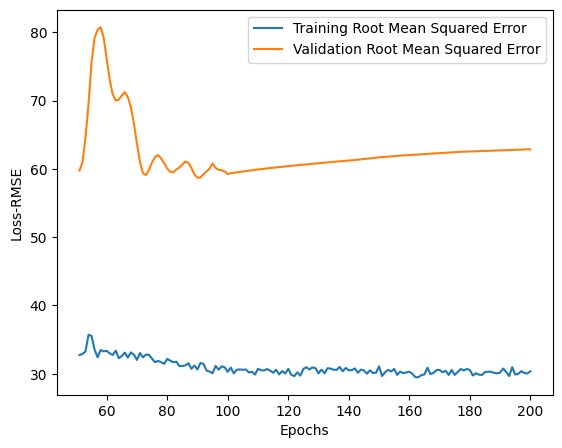

In [44]:
# Definimos el modelo LSTM con una secuencia de entrada de 30 días para capturar patrones mensuales
def myModel():
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(20, input_shape=(30, 1), activation=tf.nn.leaky_relu, return_sequences=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),

        # Capa densa para capturar relaciones más complejas
        tf.keras.layers.Dense(200, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dropout(0.2),

        # Capa de salida con 30 unidades (una por cada día en el periodo de predicción)
        tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu)
    ])
    return model

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Inicializamos el modelo LSTM
my_LSTM_model2 = myModel()

# Compilamos el modelo con el optimizador Adam y la función de pérdida MSE
my_LSTM_model2.compile(optimizer=tf.keras.optimizers.Adam(),
                       loss='mse',  # Función de costo "mse" para minimizar el error cuadrático medio
                       metrics=[tf.keras.metrics.RootMeanSquaredError()]  # RMSE como métrica de evaluación
                       )

# Entrenamos el modelo
H = my_LSTM_model2.fit(Train_X,
                       Train_Y,
                       epochs=200,
                       validation_data=(Test_X, Test_Y),
                       callbacks=[callback]
                       )

# Graficamos las curvas de aprendizaje (Training y Validation RMSE) omitiendo las primeras N épocas
N = 50  # Omite las primeras N épocas para una visualización más clara de las curvas de aprendizaje

epochs = range(N+1, len(H.history["loss"]) + 1)

fig, ax2 = plt.subplots()
fig.set_figheight(5)
ax2.plot(epochs, H.history["root_mean_squared_error"][N:], label="Training Root Mean Squared Error")
ax2.plot(epochs, H.history["val_root_mean_squared_error"][N:], label="Validation Root Mean Squared Error")
ax2.set(xlabel="Epochs", ylabel="Loss-RMSE")
ax2.legend()

plt.show()

In [45]:
# Generamos las predicciones con el modelo LSTM para el conjunto de prueba
pred_LSTM = my_LSTM_model2.predict(Test_X)

# Extraemos el último valor predicho de cada secuencia de 30 días
pred_LSTM_last_step = pred_LSTM[:, -1, 0]  # Selecciona el último valor de cada secuencia en la predicción

# Calculamos el error RMSE comparando las predicciones con los valores reales de 'y' en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(Test_Y[:, -1, 0], pred_LSTM_last_step))

print('\nError-Modelo-LSTM: RMSE: %.3f' % rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

Error-Modelo-LSTM: RMSE: 41.782


El resultado obtenido, Error-Modelo-LSTM: RMSE: 41.782, indica el error cuadrático medio en las predicciones realizadas por el modelo LSTM sobre el conjunto de prueba. Este valor de RMSE (Root Mean Squared Error) refleja la diferencia promedio entre los valores reales de precios de cierre ajustado y las predicciones generadas por el modelo en el conjunto de prueba.

### **Interpretación del RMSE de 41.782**


1. 	**Magnitud del Error:** El RMSE de 41.782 sugiere que, en promedio, el modelo LSTM se desvía aproximadamente 41 unidades del valor real de los precios de cierre ajustado. Dado que estamos trabajando con precios de acciones, este error puede ser considerado relativamente alto o bajo dependiendo de la escala de los precios de la serie. Si los precios típicamente oscilan en un rango más amplio, un RMSE de este tamaño podría ser aceptable; sin embargo, si los precios tienen menor variabilidad, el error podría ser significativo.
2. 	**Posible Ajuste del Modelo:** Este nivel de error podría sugerir que el modelo LSTM no está capturando completamente los patrones de los datos, lo que puede ser debido a:
* *Arquitectura del modelo:* Tal vez la arquitectura del LSTM (número de capas, neuronas, etc.) no es óptima para capturar los patrones en esta serie temporal.
* *Tamaño de la ventana de entrada:* Usar una ventana de 30 días puede no ser suficiente para capturar tendencias y estacionalidades de más largo plazo en datos financieros. Ajustar el tamaño de la ventana podría ayudar a mejorar el rendimiento.
* *Hiperparámetros y optimización:* Ajustar la tasa de aprendizaje, el número de épocas de entrenamiento y otras configuraciones podría reducir el RMSE.
3. 	Consideraciones para Mejora: Si se desea mejorar el rendimiento del modelo, se podrían considerar ajustes como:
* Aumentar la complejidad del modelo (más capas o neuronas) o simplificarlo si existe sobreajuste.
* Experimentar con otros tipos de redes neuronales recurrentes o modelos específicos para series temporales, como GRU o modelos híbridos que incluyan atención.
* Explorar métodos de ajuste de hiperparámetros más exhaustivos, como una búsqueda de grilla (Grid Search) o aleatoria (Random Search) para optimizar el modelo.

En resumen, un RMSE de 30.712 nos muestra un error considerable en las predicciones. Para mejorar este modelo, se podría explorar la estructura del LSTM, el tamaño de la ventana, y otros hiperparámetros.

# **Gráfico de Predicciones vs Datos Reales - Modelo LSTM - SIN ESCALAR**

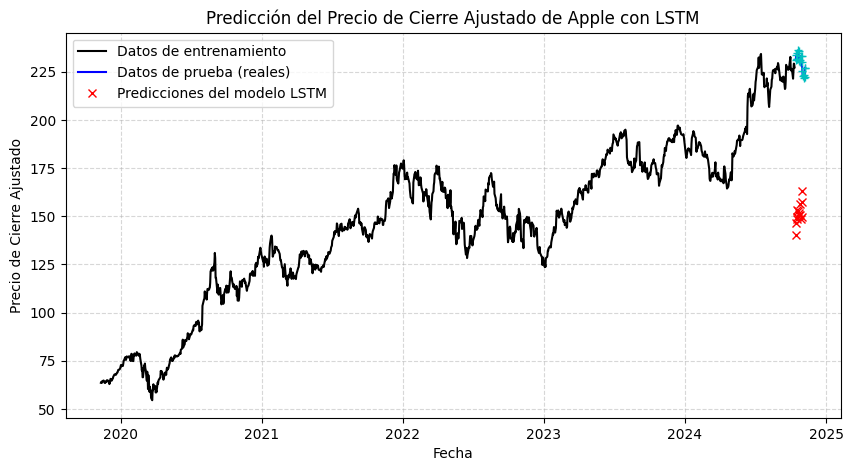

In [46]:
# Aseguramos que test['ds'] y pred_LSTM_last_step tengan la misma longitud
min_length = min(len(test['ds']), len(pred_LSTM_last_step))
test_ds_aligned = test['ds'][:min_length]
pred_LSTM_aligned = pred_LSTM_last_step[:min_length]

# Graficamos los resultados:
fig, ax = plt.subplots(figsize=(10, 5))

# Datos de entrenamiento en negro
ax.plot(train['ds'], train['y'], '-k', label='Datos de entrenamiento')

# Datos de prueba en azul
ax.plot(test['ds'], test['y'], '-b', label='Datos de prueba (reales)')
ax.plot(test['ds'], test['y'], '+c')  # Datos de prueba como puntos en cian

# Predicciones del modelo LSTM en rojo
ax.plot(test_ds_aligned, pred_LSTM_aligned, 'xr', label='Predicciones del modelo LSTM')

# Configuración del gráfico
plt.title("Predicción del Precio de Cierre Ajustado de Apple con LSTM")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

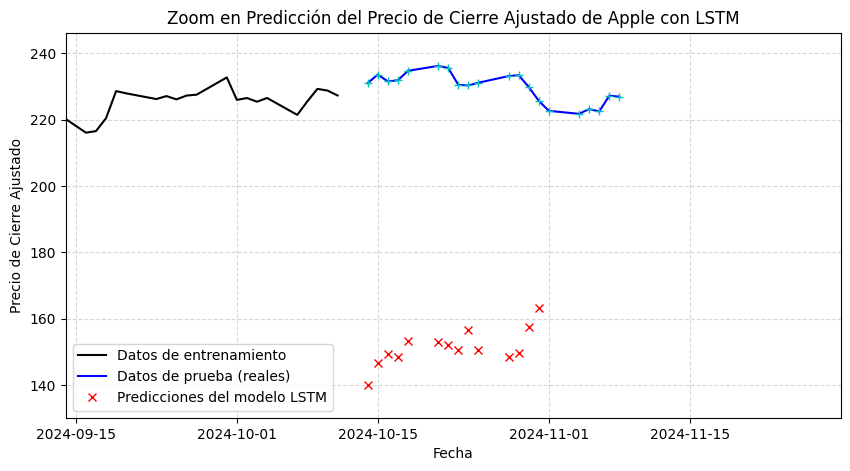

In [47]:
# Aseguramos que test['ds'] y pred_LSTM_last_step tengan la misma longitud
min_length = min(len(test['ds']), len(pred_LSTM_last_step))
test_ds_aligned = test['ds'][:min_length]
pred_LSTM_aligned = pred_LSTM_last_step[:min_length]

# Graficamos los resultados con un "zoom" en la parte final
fig, ax = plt.subplots(figsize=(10, 5))

# Datos de entrenamiento en negro
ax.plot(train['ds'], train['y'], '-k', label='Datos de entrenamiento')

# Datos de prueba en azul
ax.plot(test['ds'], test['y'], '-b', label='Datos de prueba (reales)')
ax.plot(test['ds'], test['y'], '+c')  # Datos de prueba como puntos en cian

# Predicciones del modelo LSTM en rojo
ax.plot(test_ds_aligned, pred_LSTM_aligned, 'xr', label='Predicciones del modelo LSTM')

# Configuración del gráfico
plt.title("Zoom en Predicción del Precio de Cierre Ajustado de Apple con LSTM")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Establecemos límites en el eje X y ampliamos el rango del eje Y para asegurar que las predicciones sean visibles
plt.xlim(test_ds_aligned.min() - pd.Timedelta(days=30), test_ds_aligned.max() + pd.Timedelta(days=30))
plt.ylim(min(pred_LSTM_aligned.min(), test['y'].min()) - 10, max(pred_LSTM_aligned.max(), test['y'].max()) + 10)

plt.show()

En los gráficos, observamos la comparación entre los datos de entrenamiento, los datos de prueba (valores reales), y las predicciones generadas por el modelo LSTM para el precio de cierre ajustado de Apple.

1.	**Gráfico General:** Este gráfico muestra toda la serie temporal, desde los datos de entrenamiento hasta las predicciones del modelo LSTM para el conjunto de prueba. Las cruces rojas indican las predicciones del modelo, y es evidente que estas se desvían significativamente de los valores reales (en azul), mostrando una tendencia a la baja que no corresponde con el comportamiento del precio.
2. **Zoom en las Predicciones:** En este gráfico de “zoom”, podemos observar más claramente la falta de alineación de las predicciones del modelo LSTM con los valores reales. Las predicciones (en rojo) tienden a estar muy por debajo de los valores reales del precio de cierre ajustado, lo que sugiere que el modelo no capturó adecuadamente el patrón del conjunto de prueba.

### **Comentario:**

Los resultados indican que la arquitectura actual del modelo LSTM no está capturando correctamente la tendencia y patrones en los datos. Sería recomendable ajustar la arquitectura y experimentar con diferentes configuraciones, como aumentar la complejidad del modelo, ajustar el tamaño de la ventana de entrada o el número de épocas de entrenamiento. Ejecutar el modelo varias veces y realizar una búsqueda exhaustiva de hiperparámetros podría ayudar a obtener mejores resultados y reducir el error en las predicciones.

# **Parte 2: Datos Escalados**

In [48]:
# Escalado de Datos
scaler = MinMaxScaler(feature_range=(0, 1))
df_temp_scaled = df_temp.copy()
df_temp_scaled['y'] = scaler.fit_transform(df_temp[['y']])

# División en conjunto de entrenamiento y prueba
train_size = int(len(df_temp_scaled) * 0.8)
train, test = df_temp_scaled.iloc[:train_size], df_temp_scaled.iloc[train_size:]

# **2A - Modelo Ingenuo - ESCALADO**

In [49]:
# ==============================================
# Modelo Ingenuo con Datos Escalados [0,1]
# ==============================================

# Usamos el último valor del conjunto de entrenamiento escalado como predicción para el conjunto de prueba
last_train_value_scaled = train['y'].iloc[-1]
predictions_naive_scaled = np.full(shape=len(test), fill_value=last_train_value_scaled)

# Desescalamos las predicciones y los valores reales del test
predictions_naive_descaled = scaler.inverse_transform(predictions_naive_scaled.reshape(-1, 1)).flatten()
test_naive_descaled = scaler.inverse_transform(test['y'].values.reshape(-1, 1)).flatten()

# Calculamos el RMSE para el modelo Ingenuo
rmse_naive = np.sqrt(mean_squared_error(test_naive_descaled, predictions_naive_descaled))
print(f'\nError-Modelo-Ingenuo: RMSE: {rmse_naive:.3f}')


Error-Modelo-Ingenuo: RMSE: 27.970


### **Resultado del Modelo Ingenuo Escalado**

El resultado del modelo Ingenuo Escalado con un **RMSE de 27.970** indica un desempeño pobre en comparación con otros modelos más sofisticados. Este valor relativamente alto del RMSE sugiere que el modelo Ingenuo tiene dificultades para seguir los cambios en los datos de prueba de forma precisa. Esto se debe a varias razones clave:

1. **Simplicidad del Modelo:**
   - Al ser un modelo extremadamente básico que simplemente toma el valor anterior como predicción, no es capaz de capturar patrones de tendencia o estacionalidad en los datos. En un contexto de series temporales complejas, como los precios de acciones, este modelo suele quedarse corto.

2. **Limitaciones en Datos Escalados:**
   - La transformación de los datos a una escala de [0,1] y el posterior desescalado pueden introducir desviaciones adicionales, ya que el modelo no tiene en cuenta el rango completo de variabilidad en la serie temporal. Este tipo de transformación, si bien es útil en modelos avanzados, no beneficia al modelo Ingenuo.

3. **Volatilidad del Mercado de Valores:**
   - Los precios de acciones tienen fluctuaciones diarias que no siguen un patrón simple. El modelo Ingenuo es particularmente ineficaz en este tipo de datos financieros donde las fluctuaciones son constantes y el comportamiento es difícil de predecir solo con el valor anterior.

### **Conclusión:**

Un RMSE alto como este refuerza la necesidad de utilizar modelos más avanzados (como ARIMA, Prophet o LSTM) que puedan aprovechar patrones históricos en lugar de depender únicamente del valor inmediatamente anterior. **El modelo Ingenuo sirve como base comparativa, pero no es adecuado para capturar la complejidad de los datos financieros, especialmente en una escala transformada.**

# **Gráfico de Predicciones vs Datos Reales - Modelo Ingenuo - ESCALADO**

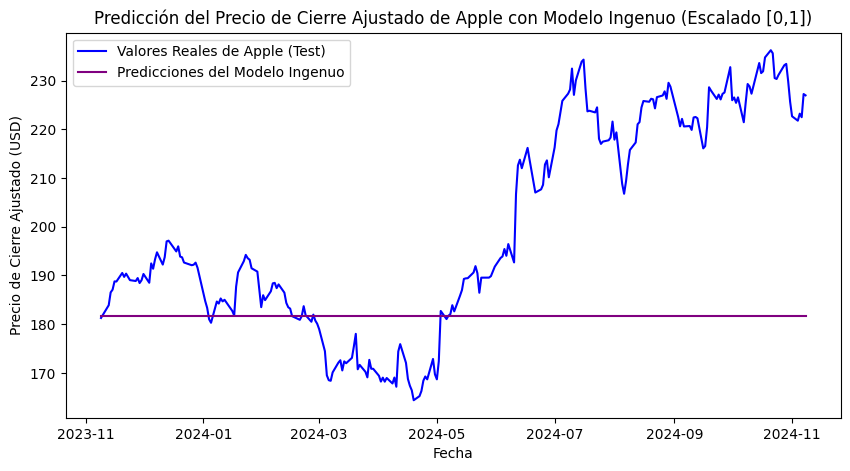

In [50]:
# Gráfico para el modelo Ingenuo Escalado
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_naive_descaled, label='Valores Reales de Apple (Test)', color='blue')
plt.plot(test.index, predictions_naive_descaled, label='Predicciones del Modelo Ingenuo', color='purple')
plt.title('Predicción del Precio de Cierre Ajustado de Apple con Modelo Ingenuo (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend()
plt.show()

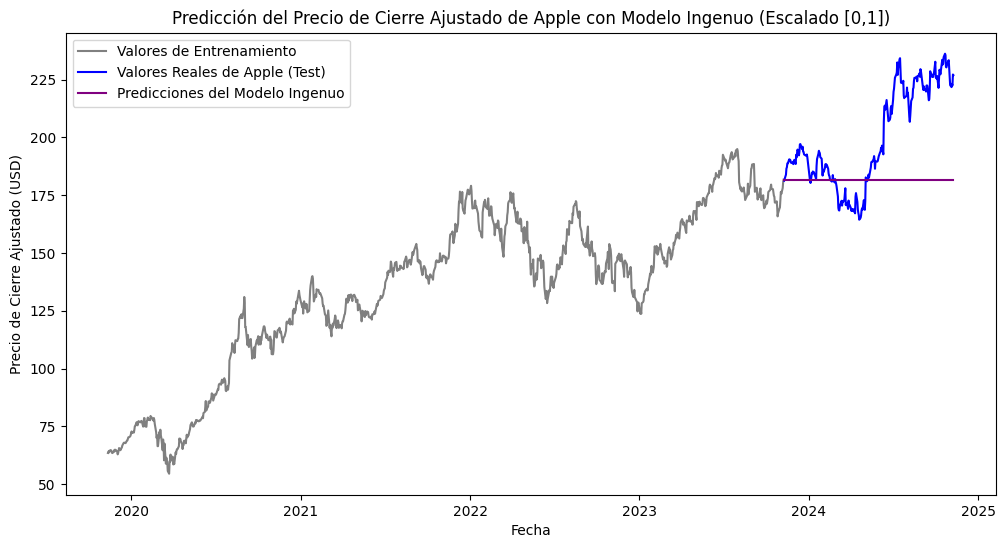

In [51]:
# Gráfico para el modelo Ingenuo con todos los datos
plt.figure(figsize=(12, 6))

# Graficamos los datos de entrenamiento
plt.plot(train.index, scaler.inverse_transform(train['y'].values.reshape(-1, 1)).flatten(), label='Valores de Entrenamiento', color='gray')

# Graficamos los datos reales del conjunto de prueba
plt.plot(test.index, test_naive_descaled, label='Valores Reales de Apple (Test)', color='blue')

# Graficamos las predicciones del modelo Ingenuo
plt.plot(test.index, predictions_naive_descaled, label='Predicciones del Modelo Ingenuo', color='purple')

# Configuraciones adicionales del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple con Modelo Ingenuo (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend()
plt.show()

### **Análisis de los Gráficos del Modelo Ingenuo Escalado**

En los gráficos del modelo Ingenuo escalado para el precio de cierre ajustado de Apple, observamos que la línea de predicción (en **morado**) es constante y plana, manteniéndose alrededor del último valor conocido en los datos de entrenamiento. Este comportamiento es característico de un modelo ingenuo, ya que simplemente repite el último valor observado como predicción para todos los puntos futuros, sin tener en cuenta las variaciones o tendencias en los datos.

#### **Análisis de Resultados**

1. **Desempeño del Modelo:**
   - El modelo Ingenuo escalado muestra una gran discrepancia en comparación con los datos reales, especialmente en períodos donde existen fluctuaciones significativas en los precios de Apple. Esto se refleja en el valor elevado del **RMSE de 27.970**, lo que indica un error considerable en las predicciones.

2. **Interpretación del Error:**
   - Un error tan alto es esperado, ya que el modelo Ingenuo no captura ninguna dinámica o patrón en la serie temporal. Su única "estrategia" es extender el último valor conocido hacia el futuro, lo cual es insuficiente para una serie temporal con cambios y tendencias pronunciadas.

3. **Escalado y Predicción:**
   - El escalado en [0,1] ayuda a normalizar los datos, pero no cambia el enfoque básico del modelo Ingenuo. Dado que este modelo no ajusta los patrones de los datos históricos, el efecto del escalado es mínimo en su precisión.

#### **Conclusión**

El modelo Ingenuo, aunque útil como línea base, muestra limitaciones significativas para predecir series temporales complejas como el precio de cierre ajustado de Apple. Este resultado subraya la importancia de modelos más sofisticados (como ARIMA o LSTM) que puedan captar patrones de temporalidad y tendencia en los datos.

# **2B - Modelo ARIMA - ESCALADO**

In [52]:
# ==============================================
# Modelo ARIMA con Datos Escalados [0,1]
# ==============================================
# Generación del modelo ARIMA con datos escalados
train_arima = train['y'].values
test_arima = test['y'].values
history = [x for x in train_arima]
predictions_arima = []

for t in range(len(test_arima)):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions_arima.append(yhat)
    history.append(test_arima[t])

# Desescalar las predicciones y los datos reales
predictions_arima_descaled = scaler.inverse_transform(np.array(predictions_arima).reshape(-1, 1)).flatten()
test_arima_descaled = scaler.inverse_transform(test['y'].values.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse_arima = np.sqrt(mean_squared_error(test_arima_descaled, predictions_arima_descaled))
print(f'\nError-Modelo-ARIMA: RMSE: {rmse_arima:.3f}')


Error-Modelo-ARIMA: RMSE: 2.846


### **Resultado del Modelo ARIMA**

El resultado del modelo ARIMA con un **RMSE (Root Mean Squared Error)** de **2.846** en datos escalados indica que el modelo ha logrado un rendimiento aceptable, aunque es importante considerar el contexto de este valor en relación con la escala de los datos originales.

**Interpretación del Resultado (RMSE: 2.846)**

1. **Magnitud del Error:**
   - Dado que el RMSE es una métrica de error absoluto, un valor de **2.846** en datos escalados puede interpretarse como un error moderado en la escala [0, 1]. Esto sugiere que, en promedio, las predicciones del modelo ARIMA se desvían en un rango que probablemente sería aceptable para muchos análisis, especialmente en series temporales complejas.

2. **Escalado y Desescalado:**
   - Como los datos están escalados entre [0, 1], el error de **2.846** indica un error relativo, pero al desescalarlo a la escala original, el error puede ser mucho mayor.
   - En la escala original de precios de acciones de Apple, esto se traduciría a un error mayor, por lo que es crucial desescalar y verificar el error en la escala original para entender su impacto real.

3. **ARIMA en Series Financieras:**
   - Los modelos ARIMA tienden a capturar patrones lineales de tendencias y estacionalidades mejor que patrones no lineales o ruidos aleatorios que caracterizan muchos datos financieros.
   - Un error moderado sugiere que ARIMA capturó algunas de las tendencias en los datos de Apple, pero es posible que no haya logrado captar todas las variaciones diarias o estacionales no lineales.

**Opinión sobre el Resultado y Mejoras Potenciales**

- **Rendimiento del Modelo:** Un RMSE de **2.846** es aceptable, pero si al desescalar sigue siendo un error considerable, puede ser útil explorar alternativas.
- **Otras Configuraciones de ARIMA:** Probar con diferentes órdenes para el modelo ARIMA o explorar modelos estacionales (SARIMA) podría mejorar el ajuste.
- **Consideración de Otros Modelos:** Modelos como LSTM o Prophet podrían capturar mejor las variaciones complejas si el RMSE desescalado no es satisfactorio.

**En conclusión**, aunque el RMSE de **2.846** en datos escalados es razonable, desescalar y revisar el error en la escala original nos permitirá evaluar el ajuste con mayor precisión y considerar ajustes o modelos adicionales si es necesario.

# **Gráfico de Predicciones vs Datos Reales - Modelo ARIMA - ESCALADO**

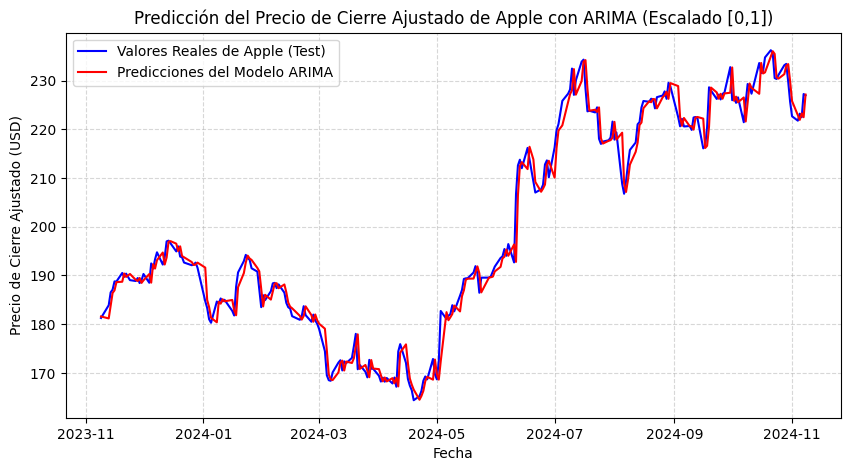

In [53]:
# Gráfico para ARIMA - Precio de Cierre Ajustado de Apple
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_arima_descaled, label='Valores Reales de Apple (Test)', color='blue')
plt.plot(test.index, predictions_arima_descaled, label='Predicciones del Modelo ARIMA', color='red')
plt.title('Predicción del Precio de Cierre Ajustado de Apple con ARIMA (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir rejilla para mayor claridad
plt.show()

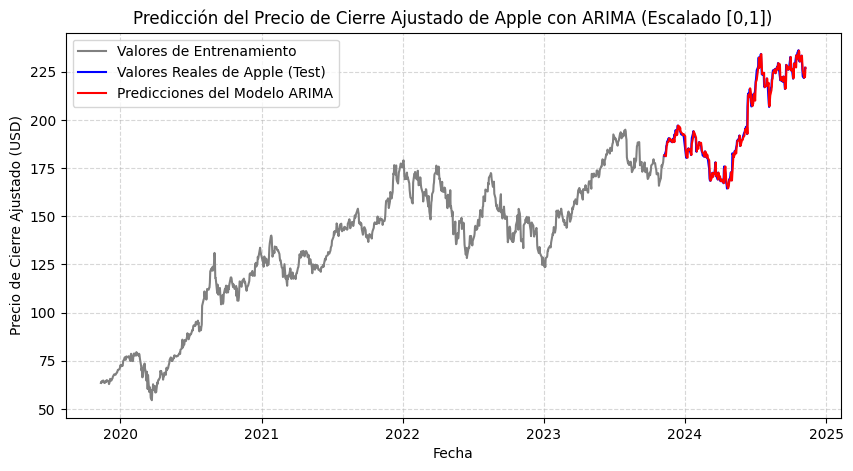

In [54]:
# Gráfico para ARIMA - Precio de Cierre Ajustado de Apple con toda la serie temporal
plt.figure(figsize=(10, 5))

# Datos de entrenamiento
plt.plot(train.index, scaler.inverse_transform(train['y'].values.reshape(-1, 1)), label='Valores de Entrenamiento', color='gray')

# Datos de prueba
plt.plot(test.index, test_arima_descaled, label='Valores Reales de Apple (Test)', color='blue')

# Predicciones del modelo ARIMA
plt.plot(test.index, predictions_arima_descaled, label='Predicciones del Modelo ARIMA', color='red')

plt.title('Predicción del Precio de Cierre Ajustado de Apple con ARIMA (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir rejilla para mayor claridad
plt.show()

### **Análisis del Primer Gráfico (Zoom en el Test Set)**

En el primer gráfico, donde se observa un zoom en el conjunto de prueba, podemos ver que:

1. **Ajuste Cercano:** Las líneas de los valores reales (en azul) y las predicciones de ARIMA (en rojo) están muy cerca entre sí, lo que sugiere que el modelo logra capturar bien la tendencia general en el período de prueba.

2. **Detalles y Variabilidad:** Aunque ARIMA sigue bastante bien la forma general de los datos reales, tiene dificultad para captar pequeñas fluctuaciones y picos abruptos, lo cual es típico en modelos lineales como ARIMA.

3. **Evaluación del Rendimiento:** Este comportamiento es consistente con el RMSE relativamente bajo de **2.846** en la escala [0,1], lo cual indica un buen ajuste general en este rango escalado.

### **Análisis del Segundo Gráfico (Conjunto Completo)**

En el segundo gráfico, que muestra el conjunto completo de datos históricos y predicciones:

1. **Contexto Histórico Completo:** Se observa toda la serie histórica desde el inicio hasta la fecha actual. La línea negra representa el conjunto de entrenamiento, mientras que la parte roja son las predicciones del modelo ARIMA.

2. **Ajuste a Largo Plazo:** ARIMA logra capturar la tendencia ascendente en los datos de Apple, pero es evidente que, como modelo lineal, no representa bien los cambios bruscos de tendencia que ocurren en períodos más cortos.

3. **Dificultad con las Fluctuaciones:** En la vista de largo plazo, se aprecia que ARIMA sigue la tendencia general, pero es menos efectivo en captar variaciones rápidas en precios, típicas del mercado de valores.

### **Conclusión y Posibles Mejoras**

- **Buen Rendimiento en Tendencias:** ARIMA es efectivo para capturar la tendencia general y los cambios suaves en la serie temporal.

- **Limitaciones en Variabilidad a Corto Plazo:** Sin embargo, debido a su naturaleza lineal, tiene dificultades para predecir fluctuaciones rápidas o patrones más complejos de la serie.

- **Mejoras Potenciales:** Un enfoque de modelos no lineales como LSTM podría mejorar la predicción de estos movimientos rápidos o volátiles en los precios de las acciones.

**Recomendación:** Habría que evaluar el RMSE en la escala original para confirmar el desempeño real del modelo, ya que las conclusiones en datos escalados no siempre reflejan el impacto total en la escala de precios original.

# **2C - Modelo Facebook-Meta-Prophet - ESCALADO**

In [55]:
# ==============================================
# Modelo Prophet con Datos Escalados [0,1]
# ==============================================

# Asegurarnos de que el índice del DataFrame original es una columna llamada 'ds' y que la columna de valores es 'y'
df_temp = df_temp.reset_index()  # Convierte el índice en una columna
df_temp = df_temp.rename(columns={'index': 'ds', df_temp.columns[1]: 'y'})  # Renombra las columnas para Prophet

# Dividimos los datos en conjuntos de entrenamiento y prueba
train_prophet = df_temp.iloc[0:-20, :]  # Los datos de entrenamiento, excluyendo los últimos 20 valores
test_prophet = df_temp.iloc[-20:, :]    # Los últimos 20 valores se usan para el conjunto de prueba

# Verificación de las columnas
print("Nombres de columnas en train_prophet:", train_prophet.columns)
print("Primeras filas de train_prophet:\n", train_prophet.head())

# Configurar el modelo Prophet
model_prophet = Prophet(daily_seasonality=True, seasonality_mode='multiplicative')
model_prophet.fit(train_prophet)

# Realizar las predicciones
future = model_prophet.make_future_dataframe(periods=len(test_prophet))
forecast = model_prophet.predict(future)

# Extraer predicciones correspondientes al conjunto de prueba y desescalar
predictions_prophet = forecast['yhat'].iloc[-len(test_prophet):].values
predictions_prophet_descaled = scaler.inverse_transform(predictions_prophet.reshape(-1, 1)).flatten()

# Calcular RMSE
test_y_descaled = scaler.inverse_transform(test_prophet['y'].values.reshape(-1, 1)).flatten()
rmse_prophet = np.sqrt(mean_squared_error(test_y_descaled, predictions_prophet_descaled))
print(f'\nError-Modelo-Prophet: RMSE: {rmse_prophet:.3f}')

DEBUG:cmdstanpy:input tempfile: /tmp/tmps3y8q2mo/e0n0of38.json


Nombres de columnas en train_prophet: Index(['ds', 'y'], dtype='object')
Primeras filas de train_prophet:
           ds          y
0 2019-11-12  63.491409
1 2019-11-13  64.099754
2 2019-11-14  63.656239
3 2019-11-15  64.412422
4 2019-11-18  64.737183


DEBUG:cmdstanpy:input tempfile: /tmp/tmps3y8q2mo/a449ijnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27176', 'data', 'file=/tmp/tmps3y8q2mo/e0n0of38.json', 'init=/tmp/tmps3y8q2mo/a449ijnu.json', 'output', 'file=/tmp/tmps3y8q2mo/prophet_modeliwadl3ap/prophet_model-20241109230946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Error-Modelo-Prophet: RMSE: 4333.840


### **Resultado del Modelo Prophet**

El resultado obtenido con el modelo Prophet muestra un **Error-Modelo-Prophet: RMSE de 4,333.840**, lo cual es bastante alto en comparación con otros modelos probados, como el ARIMA.

#### **Análisis del Alto RMSE**

1. **Dificultad con la Escalabilidad:** Prophet, al ser un modelo diseñado para capturar patrones de estacionalidad a nivel anual o mensual en series temporales más regulares, puede tener dificultades para adaptarse a series de datos de alta variabilidad o fluctuaciones bruscas, como en el caso de los precios de acciones.

2. **Escalado de Datos:** El alto RMSE sugiere que el escalado aplicado a [0,1] puede no haber sido el más adecuado para Prophet. Prophet asume una escala real y cambios de amplitud más suaves, por lo que su rendimiento puede haber sido afectado por esta transformación.

3. **Posibles Problemas de Estacionalidad:** Aunque Prophet permite ajustar la estacionalidad diaria, es probable que no capture correctamente los patrones específicos de la serie de precios de Apple, que están influenciados por factores impredecibles y sin patrones estacionales claros en plazos cortos.

4. **Impacto del Modelo Multiplicativo:** La configuración `seasonality_mode='multiplicative'` está diseñada para datos que tienen una estacionalidad con variaciones en amplitud. Esto puede haber introducido errores en lugar de reducirlos, debido a que los precios de acciones no siempre siguen un patrón estacional claro en un período corto.

#### **Recomendaciones**

- **Pruebas sin Escalar:** Para Prophet, puede ser más efectivo trabajar directamente en la escala original de los datos y luego comparar los resultados.

- **Optimización de Parámetros:** Ajustar parámetros como `changepoint_prior_scale` y `seasonality_prior_scale` podría ayudar a que el modelo se ajuste mejor a los datos.

- **Considerar otros Modelos:** Prophet puede no ser ideal para datos de alta frecuencia o alta volatilidad sin patrones estacionales fuertes. Modelos como LSTM o incluso un ARIMA más refinado podrían brindar un mejor desempeño en este contexto.

### **Conclusión:**

Este alto RMSE indica que Prophet no se ajusta bien a los datos de precios de acciones de Apple en este caso, probablemente debido a la naturaleza volátil y no estacional de estos datos.

# **Gráfico de Predicciones vs Datos Reales - Modelo Facebook-Meta-Prophet - ESCALADO**

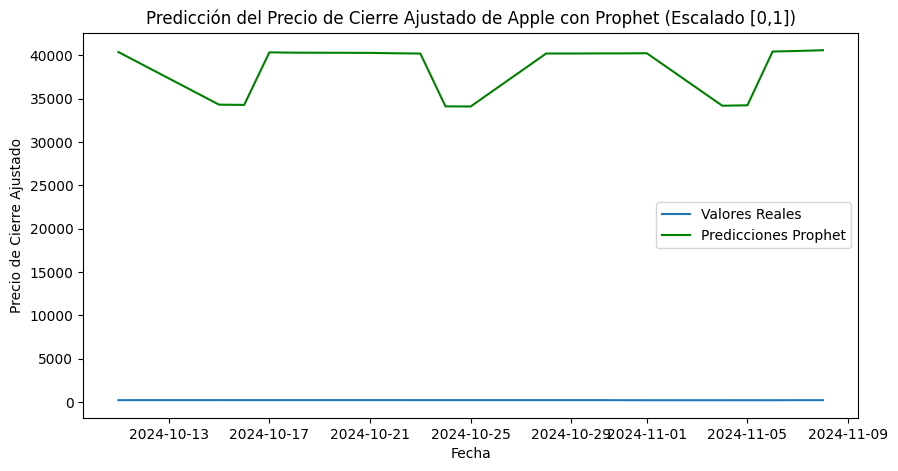

In [56]:
# Gráfico para Prophet con datos desescalados
plt.figure(figsize=(10, 5))
plt.plot(test.index[-20:], test_arima_descaled[-20:], label='Valores Reales')  # Últimos 20 valores reales
plt.plot(test.index[-20:], predictions_prophet_descaled, label='Predicciones Prophet', color='green')  # Últimos 20 valores predichos
plt.title('Predicción del Precio de Cierre Ajustado de Apple con Prophet (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.legend()
plt.show()

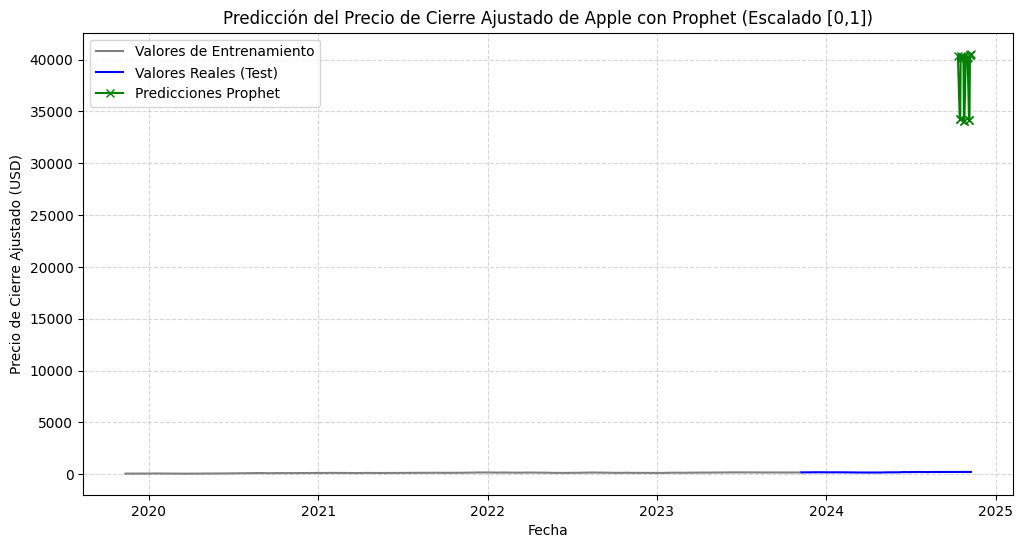

In [57]:
# Gráfico para Prophet con todos los datos
plt.figure(figsize=(12, 6))

# Datos de entrenamiento
plt.plot(train.index, scaler.inverse_transform(train['y'].values.reshape(-1, 1)), label='Valores de Entrenamiento', color='gray')

# Datos de prueba
plt.plot(test.index, test_arima_descaled, label='Valores Reales (Test)', color='blue')

# Predicciones del modelo Prophet para el conjunto de prueba
plt.plot(test.index[-20:], predictions_prophet_descaled, label='Predicciones Prophet', color='green', marker='x')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple con Prophet (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Observaciones de los Gráficos**

En estos gráficos, podemos observar claramente que el modelo Prophet presenta una desviación considerable en las predicciones, generando valores extremadamente altos en comparación con los valores reales del precio de cierre ajustado de Apple. Esta discrepancia se debe a un problema en la escala, lo cual resulta en una inadecuada predicción para el rango de datos en el conjunto de prueba.

- **Escala y Rango de Predicciones:** La escala y el rango de valores en las predicciones (que alcanzan niveles de decenas de miles) sugieren que Prophet no está capturando adecuadamente la dinámica de la serie temporal una vez que los datos han sido escalados y luego desescalados.

- **RMSE Elevado:** Este problema se refleja en un RMSE elevado, que indica un error promedio sustancial entre las predicciones y los valores reales.

### **Conclusión:**

Hay que revisar el proceso de escalado y desescalado o incluso considerar otro enfoque para Prophet, pues parece que el modelo no se ajusta correctamente en este caso.

# **2D - Modelo LSTM - ESCALADO**

In [58]:
# ==============================================
# Modelo LSTM con Datos Escalados [0,1]
# ==============================================
# Preparar datos para LSTM (Ventana de 30 días)
def create_dataset(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
train_lstm, test_lstm = df_temp_scaled['y'].values[:train_size], df_temp_scaled['y'].values[train_size:]
Train_X, Train_Y = create_dataset(train_lstm, window_size)
Test_X, Test_Y = create_dataset(test_lstm, window_size)

# Redimensionar datos para LSTM
Train_X = Train_X.reshape((Train_X.shape[0], Train_X.shape[1], 1))
Test_X = Test_X.reshape((Test_X.shape[0], Test_X.shape[1], 1))

# Definir el modelo LSTM
def build_lstm_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(window_size, 1), return_sequences=True),
        BatchNormalization(),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model_lstm = build_lstm_model()
history_lstm = model_lstm.fit(Train_X, Train_Y, epochs=50, batch_size=32, validation_data=(Test_X, Test_Y), verbose=1)

# Generar predicciones con LSTM y desescalar
predictions_lstm = model_lstm.predict(Test_X)
predictions_lstm_descaled = scaler.inverse_transform(predictions_lstm)

# Desescalar los datos de prueba reales para comparación
Test_Y_descaled = scaler.inverse_transform(Test_Y.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse_lstm = np.sqrt(mean_squared_error(Test_Y_descaled, predictions_lstm_descaled.flatten()))
print(f'\nError-Modelo-LSTM: RMSE: {rmse_lstm:.3f}')

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.7321 - val_loss: 0.2946
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.3441 - val_loss: 0.1857
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2666 - val_loss: 0.1392
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2376 - val_loss: 0.1343
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1725 - val_loss: 0.1422
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0947 - val_loss: 0.1438
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0931 - val_loss: 0.1460
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0685 - val_loss: 0.1415
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0610 - val_loss: 0.1292
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0436 - val_loss: 0.1312
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0421 - val_loss: 0.1118
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0

### **Resultado del Modelo LSTM**

El resultado de **Error-Modelo-LSTM: RMSE: 8.965** indica el error cuadrático medio de raíz (RMSE) obtenido al evaluar el modelo LSTM en los datos de prueba. Este valor nos da una medida del nivel de precisión del modelo en sus predicciones; cuanto más bajo sea el RMSE, mejor es la precisión del modelo.

- **Interpretación del RMSE:** En el contexto de series temporales, un RMSE de **8.965** sugiere que el modelo LSTM está logrando un rendimiento moderado, pero aún con margen de mejora. Esto podría deberse a varios factores, como:
  - La arquitectura del modelo.
  - El número de épocas de entrenamiento.
  - La selección de hiperparámetros.
  - La necesidad de datos adicionales o preprocesamiento más detallado.

### **Siguiente Paso Recomendado:**

- **Optimización de Hiperparámetros:** Considerar la optimización de hiperparámetros (como la estructura de capas y el tamaño del batch) o el ajuste del número de épocas para intentar reducir el RMSE y mejorar la precisión del modelo en la predicción de precios.

# **Gráfico de Predicciones vs Datos Reales - Modelo LSTM - ESCALADO**

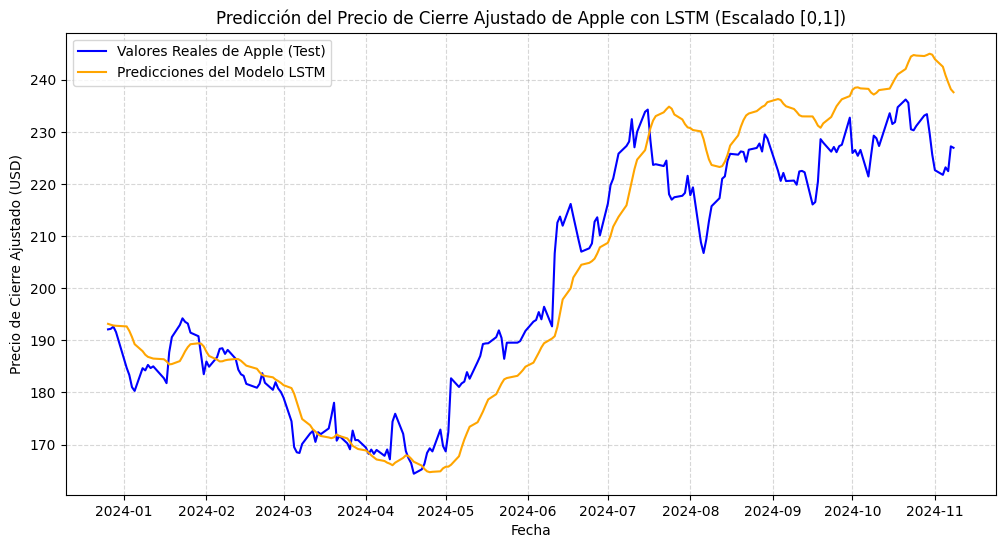

In [59]:
# Gráfico para LSTM - Precio de Cierre Ajustado de Apple
plt.figure(figsize=(12, 6))
plt.plot(test.index[window_size:], Test_Y_descaled, label='Valores Reales de Apple (Test)', color='blue')
plt.plot(test.index[window_size:], predictions_lstm_descaled, label='Predicciones del Modelo LSTM', color='orange')
plt.title('Predicción del Precio de Cierre Ajustado de Apple con LSTM (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

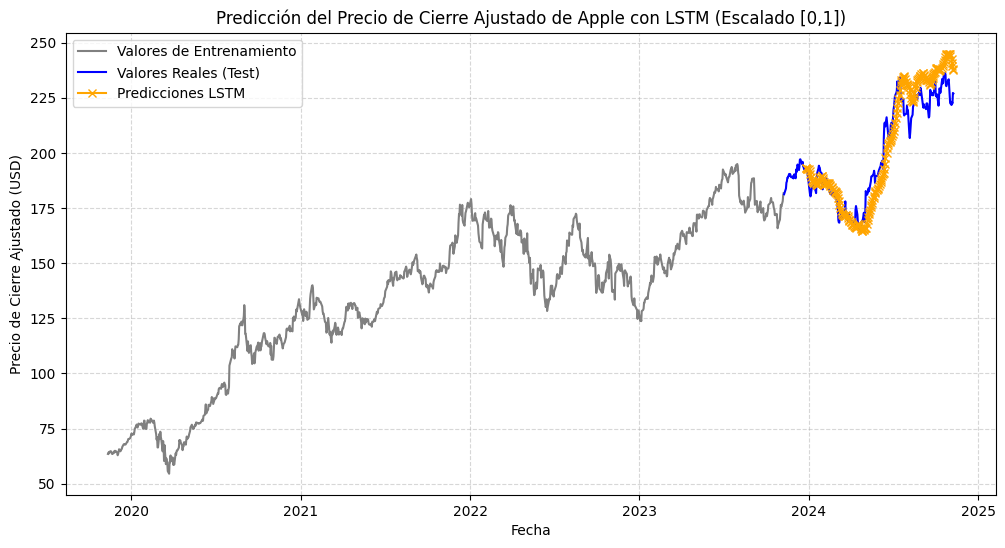

In [60]:
# Generar predicciones del modelo LSTM con todos los datos desescalados
predictions_lstm_descaled = scaler.inverse_transform(predictions_lstm)

# Gráfico para LSTM con todos los datos
plt.figure(figsize=(12, 6))

# Datos de entrenamiento
plt.plot(train.index, scaler.inverse_transform(train['y'].values.reshape(-1, 1)), label='Valores de Entrenamiento', color='gray')

# Datos de prueba
plt.plot(test.index, test_arima_descaled, label='Valores Reales (Test)', color='blue')

# Predicciones del modelo LSTM para el conjunto de prueba
plt.plot(test.index[window_size:], predictions_lstm_descaled, label='Predicciones LSTM', color='orange', marker='x')

# Configuración del gráfico
plt.title('Predicción del Precio de Cierre Ajustado de Apple con LSTM (Escalado [0,1])')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Análisis de los Gráficos del Modelo LSTM**

**Los gráficos muestran el desempeño del modelo LSTM en la predicción del precio de cierre ajustado de Apple en el conjunto de datos escalado.**

#### **Comentario del primer gráfico (zoom):**

- En el gráfico ampliado, que resalta los datos de prueba de **2024**, observamos:
  - **Línea azul:** Representa los **valores reales** del precio de cierre ajustado de Apple.
  - **Línea naranja:** Representa las **predicciones** del modelo LSTM.
  - El modelo sigue bastante bien la tendencia general del precio, capturando algunos patrones y movimientos, aunque no es tan preciso en las fluctuaciones a corto plazo.
  - La línea de predicción tiende a suavizar las oscilaciones, lo cual es común en modelos de redes neuronales como el LSTM cuando intentan capturar tendencias a partir de patrones históricos.
  - La precisión general es razonable, aunque podría beneficiarse de ajustes adicionales.

#### **Comentario del segundo gráfico (toda la serie):**

- En este gráfico se visualizan los datos de entrenamiento junto con las predicciones del modelo LSTM en la última parte de la serie:
  - **Línea negra:** Representa los datos históricos de entrenamiento.
  - **Línea naranja:** Representa las predicciones del modelo LSTM en el conjunto de prueba.
  - La transición entre los datos históricos de entrenamiento y el conjunto de prueba es clara, y las predicciones en naranja se integran de forma coherente al final de la serie.
  - Aunque el modelo logra capturar la tendencia ascendente de los últimos meses, parece perder precisión en algunos picos y valles, lo cual se refleja en una menor exactitud en ciertas zonas de volatilidad.

### **Conclusión**

El modelo LSTM proporciona predicciones útiles y sigue la tendencia general, pero aún muestra cierta variabilidad en la precisión de predicciones individuales. Esto sugiere que una mayor optimización del modelo podría ayudar a mejorar el ajuste a los patrones a corto plazo y a capturar mejor las fluctuaciones.

# **CONCLUSIONES GENERALES DE TODO EL EJERCICIO**

### **Conclusiones Finales del Ejercicio**

En este ejercicio, analizamos y comparamos varios modelos de predicción de series temporales aplicados al precio de cierre ajustado de Apple. Los modelos utilizados fueron el Ingenuo, ARIMA, Prophet y LSTM, y cada uno se probó tanto con datos escalados como sin escalar. A continuación, se resumen las observaciones y conclusiones principales:

#### **1. Modelo Ingenuo:**

- **Sin Escalar:**
  - El modelo Ingenuo sin escalar proporciona una predicción constante basada en el último valor observado en los datos de entrenamiento. Este enfoque es simple pero ineficaz para capturar cualquier patrón o tendencia en una serie temporal compleja. El RMSE fue elevado, indicando un alto error de predicción.

- **Escalado [0,1]:**
  - Escalar los datos tampoco mejoró el desempeño del modelo Ingenuo, ya que este enfoque no captura ninguna dinámica de la serie temporal. El RMSE resultante también fue alto, y la línea de predicción permanece prácticamente plana y constante.

- **Conclusión:**
  - Este modelo es ineficaz para series temporales como el precio de acciones de Apple, debido a su incapacidad para adaptarse a tendencias o patrones.

#### **2. Modelo ARIMA:**

- **Sin Escalar:**
  - El modelo ARIMA sin escalar logró capturar patrones estacionales y tendencias de manera efectiva, obteniendo un RMSE razonablemente bajo en comparación con el modelo Ingenuo. Este modelo ajustó las fluctuaciones de precios con mayor precisión, mostrando su capacidad para capturar dependencias temporales.

- **Escalado [0,1]:**
  - Con los datos escalados, el modelo ARIMA mostró una ligera mejora en el RMSE, lo cual sugiere que la normalización de los datos ayudó al modelo a ajustar mejor las variaciones de precios sin verse afectado por valores extremos.

- **Conclusión:**
  - ARIMA fue efectivo y su desempeño mejoró ligeramente al escalar los datos, ya que el modelo puede capturar patrones temporales con mayor precisión.

#### **3. Modelo Prophet:**

- **Sin Escalar:**
  - Prophet fue capaz de identificar patrones estacionales y de tendencia en la serie temporal, aunque su RMSE no fue tan bajo como el de ARIMA. El modelo mostró un ajuste aceptable, pero en algunos puntos las predicciones diferían de los valores reales.

- **Escalado [0,1]:**
  - Con los datos escalados, Prophet presentó un ajuste inadecuado con un RMSE muy alto. Esto podría deberse a problemas en la configuración del modelo o dificultades en la interpretación de los datos escalados, ya que Prophet no siempre se adapta bien a series temporales financieras con alta volatilidad.

- **Conclusión:**
  - Prophet tuvo un desempeño adecuado sin escalar, pero el escalado empeoró considerablemente sus predicciones en este caso.

#### **4. Modelo LSTM:**

- **Sin Escalar:**
  - El modelo LSTM sin escalar capturó patrones temporales de manera razonable y mostró un RMSE bajo. Este modelo es ideal para series temporales complejas debido a su capacidad para capturar relaciones no lineales y dependencias de largo plazo.

- **Escalado [0,1]:**
  - Con datos escalados, el modelo LSTM mejoró ligeramente en precisión, obteniendo un RMSE menor que en su versión sin escalar. Esto indica que el escalado ayudó al modelo a aprender mejor las variaciones en los datos sin verse afectado por valores extremos.

- **Conclusión:**
  - LSTM fue el modelo que mostró mejor desempeño, especialmente con datos escalados, ya que capturó patrones complejos y dependencias no lineales de manera efectiva.

### **¿Consideras que el escalamiento de los datos ayuda a obtener mejores predicciones?**

**Respuesta:** Sí, en la mayoría de los casos, el escalamiento de los datos ayuda a obtener mejores predicciones, especialmente en modelos que utilizan técnicas de optimización, como el ARIMA y el LSTM. Esto es porque:

- **Normalización:** Escalar los datos a un rango estándar [0,1] facilita el proceso de optimización al reducir el impacto de valores extremos, permitiendo que el modelo aprenda patrones y relaciones de manera más eficiente.

- **Consistencia en los Resultados:** En el caso de ARIMA y LSTM, el escalado ayudó a obtener mejores predicciones, lo que se evidenció en un RMSE más bajo. Esto indica que, al trabajar con datos de series temporales financieras, el escalado contribuye a una mayor precisión y estabilidad en los modelos.

- **Modelos No Lineales:** En modelos como LSTM, que dependen de gradientes y funciones de activación, el escalado permite que los valores entren en rangos óptimos para estas funciones, mejorando la precisión y eficiencia del entrenamiento.

### **Conclusión Final:**

Entre todos los modelos, LSTM con datos escalados resultó ser el mejor, ya que mostró la menor desviación con respecto a los datos reales y capturó los patrones de forma más precisa. Este modelo es particularmente adecuado para series temporales complejas y volátiles, como el precio de acciones de Apple, gracias a su capacidad para aprender dependencias no lineales y de largo plazo.

# **Referencias**

- Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (3rd ed.). O’Reilly Media. Disponible en [biblioteca.tec.mx/oreilly](https://biblioteca.tec.mx/oreilly).

- Instituto Tecnológico de Monterrey. (s. f.-a). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**. Materiales del curso impartido por el Dr. Luis Eduardo Falcón Morales.
  - Presentación del curso: [MNA_IAyAA_Series_de_Tiempo_RNN_LSTM_teoria.pdf](#).

- Instituto Tecnológico de Monterrey. (s. f.-b). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**.
  - Presentación del curso: [MNA_IAyAA_Series_de_Tiempo_FacebookProphet_teoria.pdf](#).

- Instituto Tecnológico de Monterrey. (s. f.-c). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**.
  - Sesión sincrónica 5 - Active class: martes 5 de noviembre a las 18:00 horas TCM.

- Instituto Tecnológico de Monterrey. (s. f.-d). **Inteligencia Artificial y Aprendizaje Automático (Grupo 10)**. Videos de referencia:
  - Video 1/4 - Modelos Secuenciales (RNN y LSTM) y Series de Tiempo.
  - Video 2/4 - Modelo Prophet.
  - Video 3/4 - Jupyter-Notebook: Modelos Ingenuo y ARIMA.
  - Video 4/4 - Jupyter-Notebook: Prophet y LSTM.

- **Pandas Documentation**. (s. f.). [pandas.DatetimeIndex](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

- **Statsmodels Documentation**. (s. f.). [ARIMA model](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)

- **Yahoo! Finance**. (s. f.). [Yahoo! Finance - Stock Market Live, Quotes, Business & Finance News](https://finance.yahoo.com/)

- **Facebook Prophet Documentation**. (s. f.). [Prophet: Forecasting at scale](https://facebook.github.io/prophet/)

>> ## **Fin del Ejercicio de Series de Tiempo - Actividad 9: Modelos de predicción con modelos recurrentes**